In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib as mpl
 
mpl.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1909 = df[df['기준년월'] == 201909]
df_1909.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
66588,201909,16,식품,1612,음료,여성,20대,신혼영유아가구,서울특별시,강동구,길동,401631,9
66590,201909,11,패션잡화,1112,가방,여성,30대,신혼영유아가구,서울특별시,광진구,능동,1688549,17
66591,201909,20,여가/스포츠,2013,여행,여성,40대,초중고자녀가구,서울특별시,광진구,능동,2128596,19
66592,201909,16,식품,1612,음료,여성,30대,1인가구,서울특별시,광진구,능동,95919,5
66598,201909,11,패션잡화,1112,가방,여성,40대,신혼영유아가구,서울특별시,양천구,목동,2621338,12
66599,201909,15,전자,1510,가전,여성,40대,신혼영유아가구,서울특별시,양천구,목동,955559,14
66600,201909,11,패션잡화,1110,양말,여성,50대,성인자녀가구,서울특별시,양천구,목동,234707,7
66604,201909,20,여가/스포츠,2011,레저,남성,30대,신혼영유아가구,서울특별시,중랑구,묵동,699976,9
66605,201909,20,여가/스포츠,2012,문화,여성,20대,1인가구,서울특별시,중랑구,묵동,6620798,53
66606,201909,11,패션잡화,1111,신발,여성,50대,성인자녀가구,서울특별시,중랑구,묵동,772965,17


In [5]:
sigoongu = list(set(df_1909['고객소재지_시군구']))
print(len(sigoongu))

big_category = list(set(df_1909['품목대분류명']))
print(len(big_category))

middle_category = list(set(df_1909['품목중분류명']))
print(len(middle_category))

lifestyle = list(set(df_1909['가구생애주기']))
print(len(lifestyle))

25
13
49
5


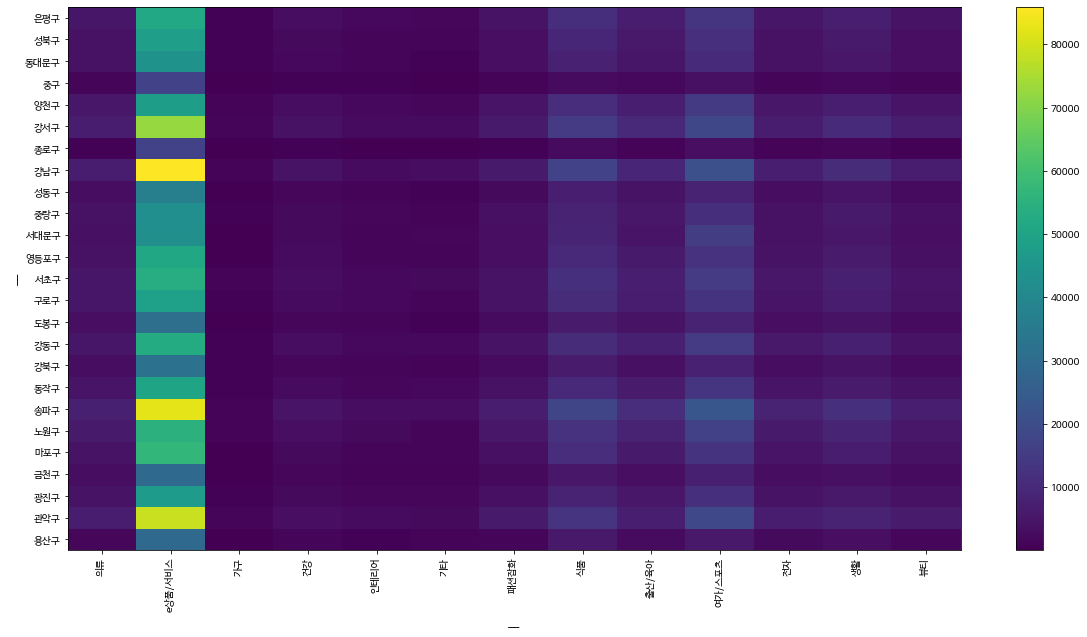

In [6]:
# 시군구 - 매출건수
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_large = sigoongu_moneycount_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_moneycount_large)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_large.columns), 1), sigoongu_moneycount_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_large.index), 1), sigoongu_moneycount_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [7]:
sigoongu_moneycount_large.head()

,의류,e상품/서비스,가구,건강,인테리어,기타,패션잡화,식품,출산/육아,여가/스포츠,전자,생활,뷰티
용산구,1439,29167,64,1150,485,801,1177,5521,2505,5506,2043,3321,1596
관악구,6469,78721,1141,3207,2440,2238,5788,12904,7253,18609,6719,8175,6110
광진구,4119,46917,478,2156,1412,1374,3688,8414,5210,11893,4135,5671,3735
금천구,2770,29161,339,1500,1001,845,2246,5206,3161,7435,2840,3659,2397
마포구,4127,56564,344,2265,1292,1154,3677,10792,5999,12507,4622,6613,3870


In [8]:
# 클러스터링
# 시군구 - 매출건수

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_moneycount_large['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_moneycount_large[sigoongu_moneycount_large['cluster_id'] == i]
    print(temp['cluster_id'])

광진구     0
서대문구    0
중랑구     0
동대문구    0
성북구     0
Name: cluster_id, dtype: int32
관악구    1
송파구    1
강남구    1
강서구    1
Name: cluster_id, dtype: int32
용산구    2
금천구    2
강북구    2
도봉구    2
성동구    2
Name: cluster_id, dtype: int32
마포구     3
노원구     3
동작구     3
강동구     3
구로구     3
서초구     3
영등포구    3
양천구     3
은평구     3
Name: cluster_id, dtype: int32
종로구    4
중구     4
Name: cluster_id, dtype: int32


In [9]:
# 데이터 프레임 재구성
dict = {}
sigoongu_name = sigoongu_moneycount_large.index
cluster_label = sigoongu_moneycount_large['cluster_id'].tolist()

for i in range(25):
    dict[sigoongu_name[i]] = cluster_label[i]

temp = []
for index, row in df_1909.iterrows():
    temp_dict = row.to_dict()
    temp_dict['large_moneycount_cluster'] = dict[row['고객소재지_시군구']]
    temp.append(temp_dict)
df_1909 = pd.DataFrame(temp)

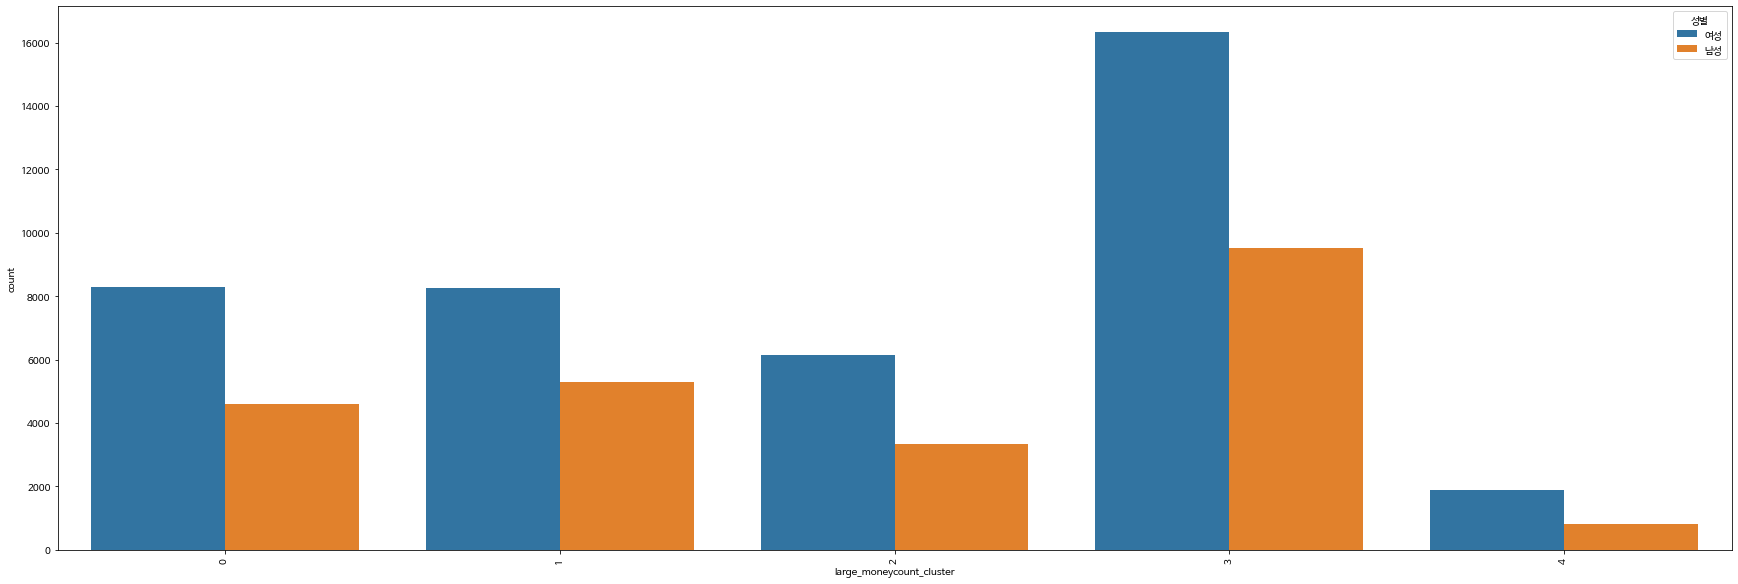

In [11]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_moneycount_cluster', hue = '성별', data = df_1909)
plt.xticks(rotation = 90)
plt.show()

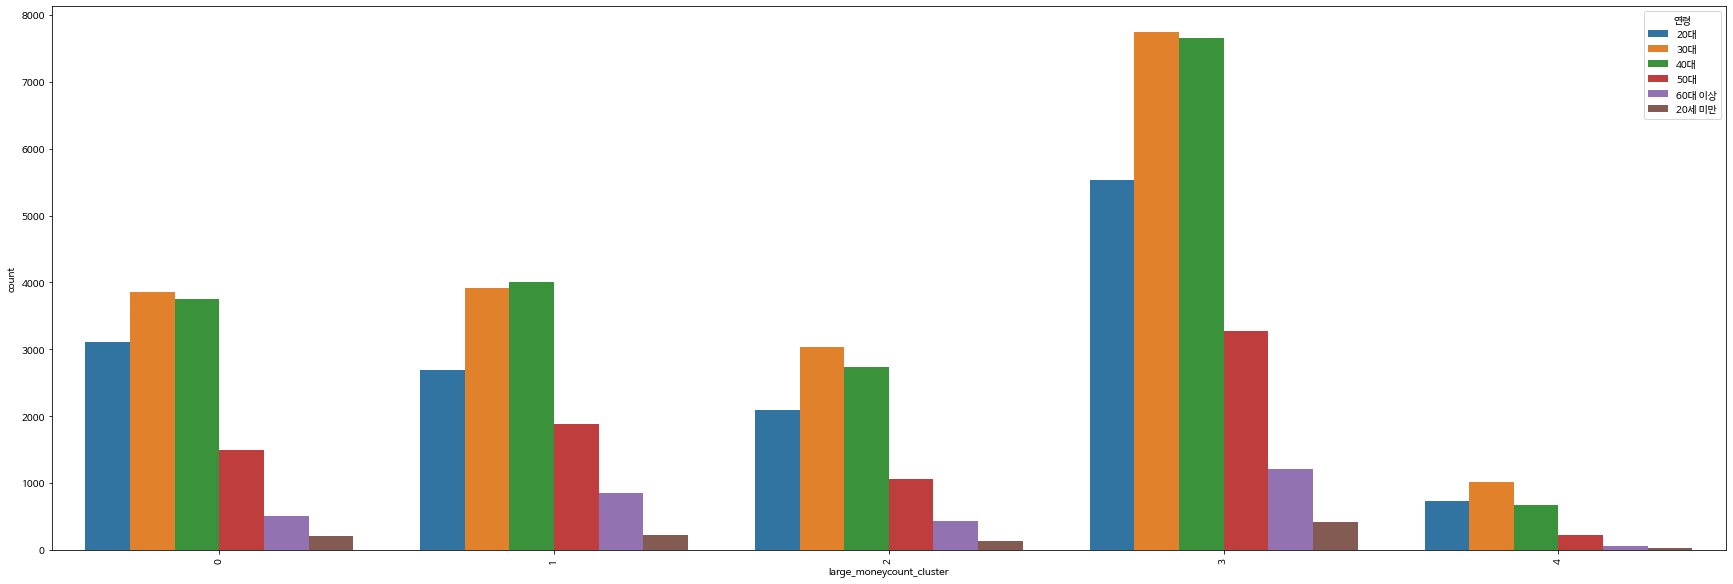

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_moneycount_cluster', hue = '연령', data = df_1909)
plt.xticks(rotation = 90)
plt.show()

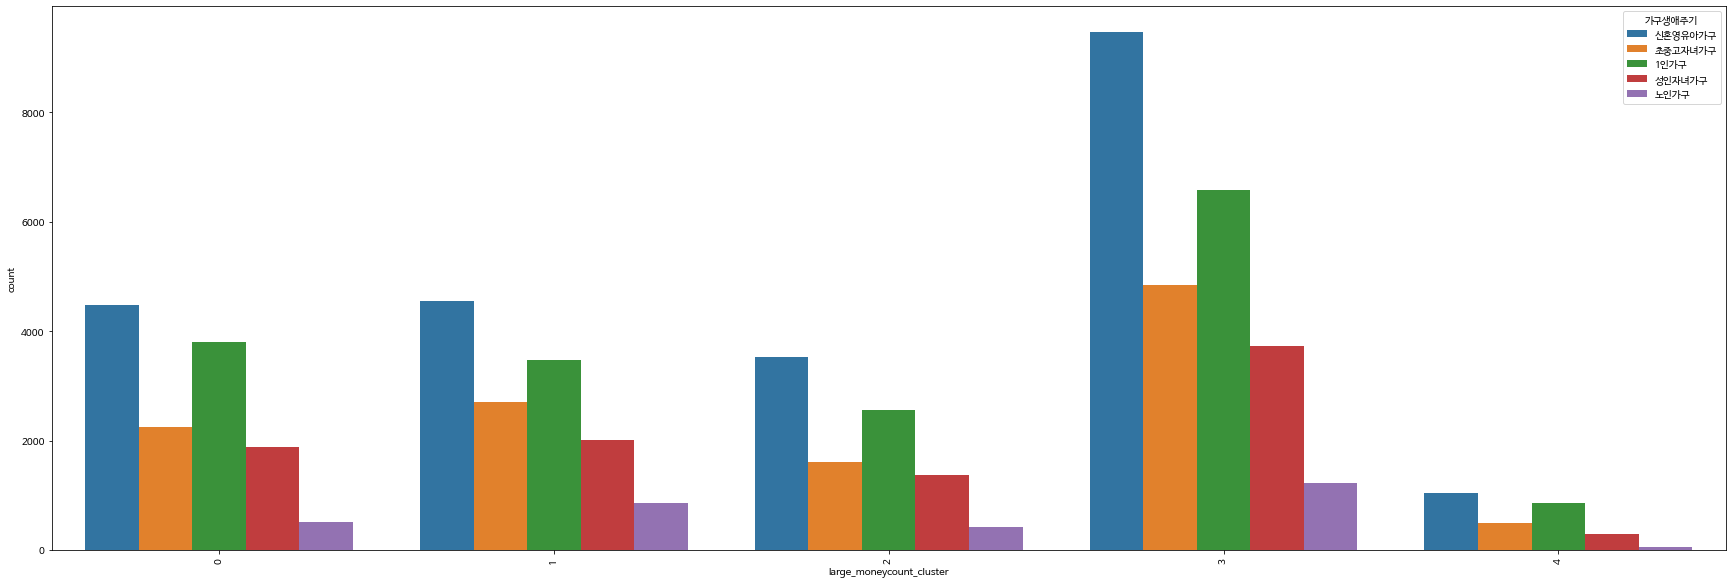

In [13]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_moneycount_cluster', hue = '가구생애주기', data = df_1909)
plt.xticks(rotation = 90)
plt.show()

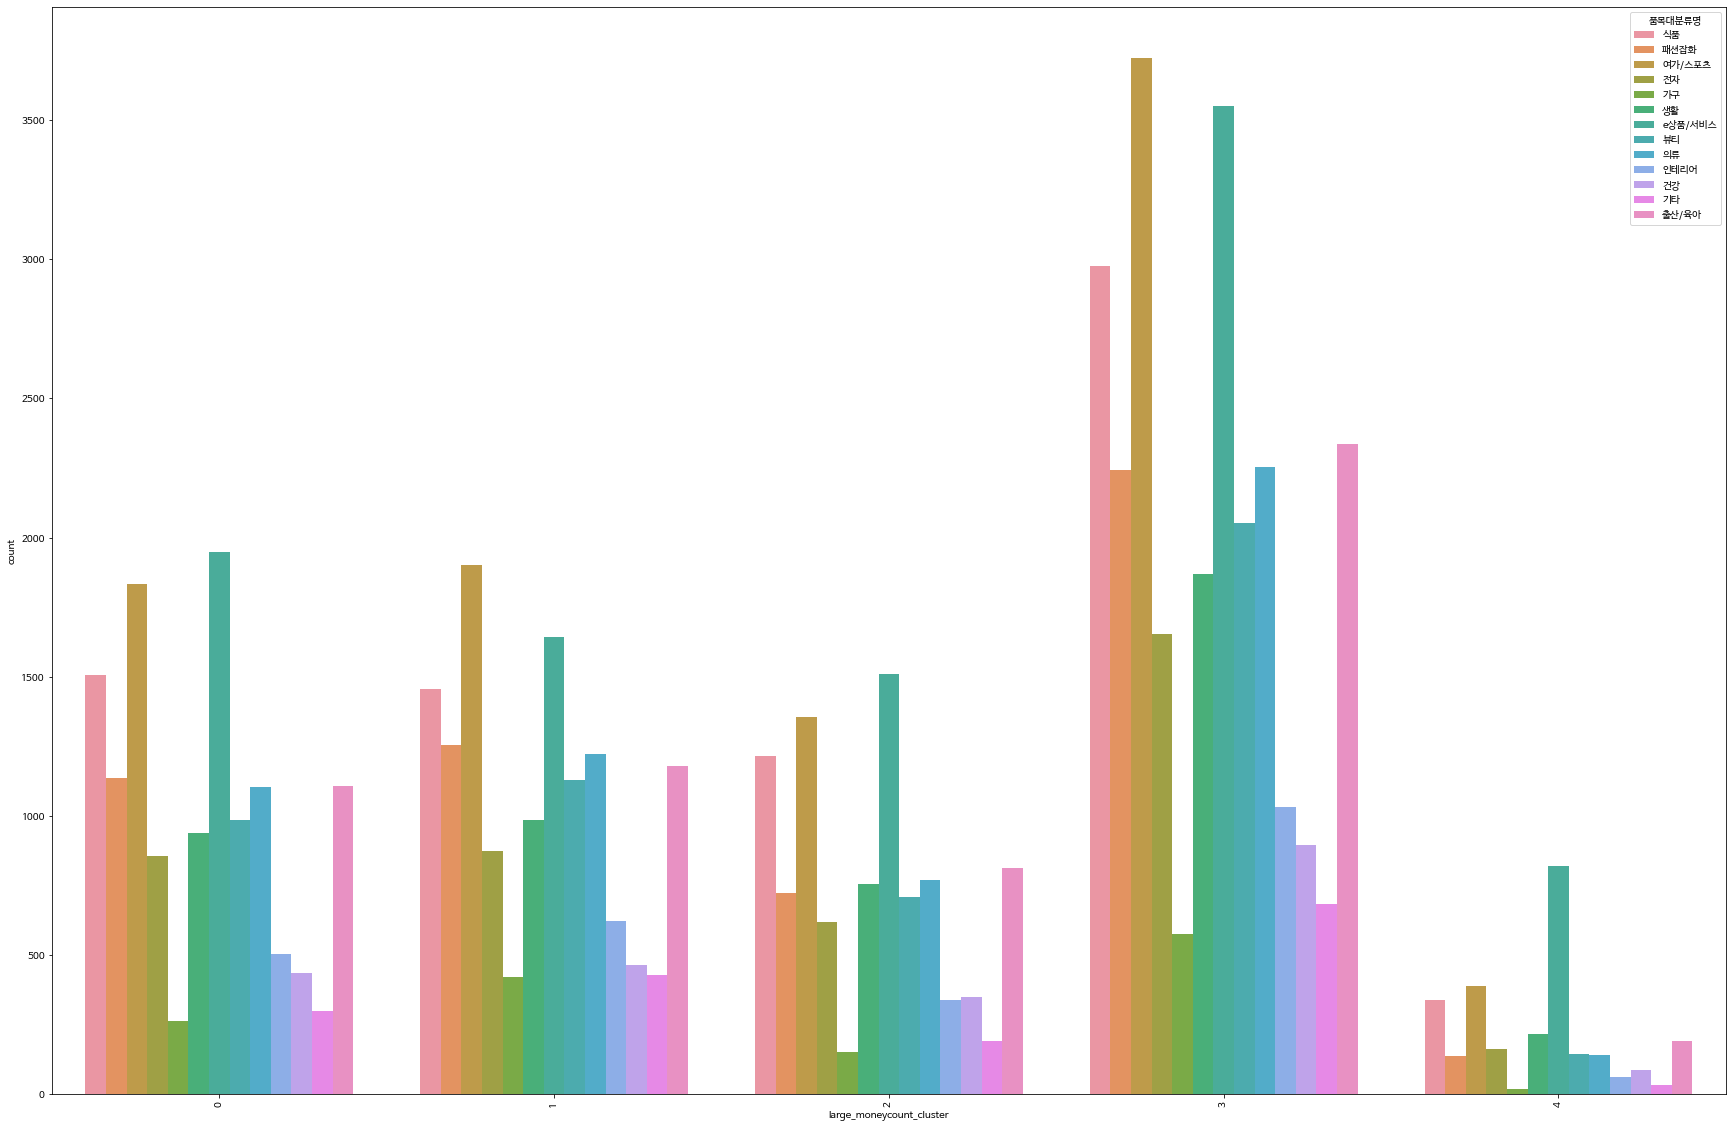

In [14]:
plt.figure(figsize=(30,20))
sns.countplot(x='large_moneycount_cluster', hue = '품목대분류명', data = df_1909)
plt.xticks(rotation = 90)
plt.show()

In [29]:
# cluster == 0
df_1909_cluster0 = df_1909[df_1909['large_moneycount_cluster'] == 0]
cluster0_list = []
cluster0_list = df_1909_cluster0['고객소재지_시군구'].unique()

print(cluster0_list)

iscluster0 = []
for i in range(len(cluster0_list)):
    iscluster0.append(df_1909_cluster0['고객소재지_시군구'] == cluster0_list[i])
    
cluster0 = []
for i in range(len(cluster0_list)):
    cluster0.append(df_1909_cluster0[iscluster0[i]])
    


['광진구' '중랑구' '성북구' '동대문구' '서대문구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

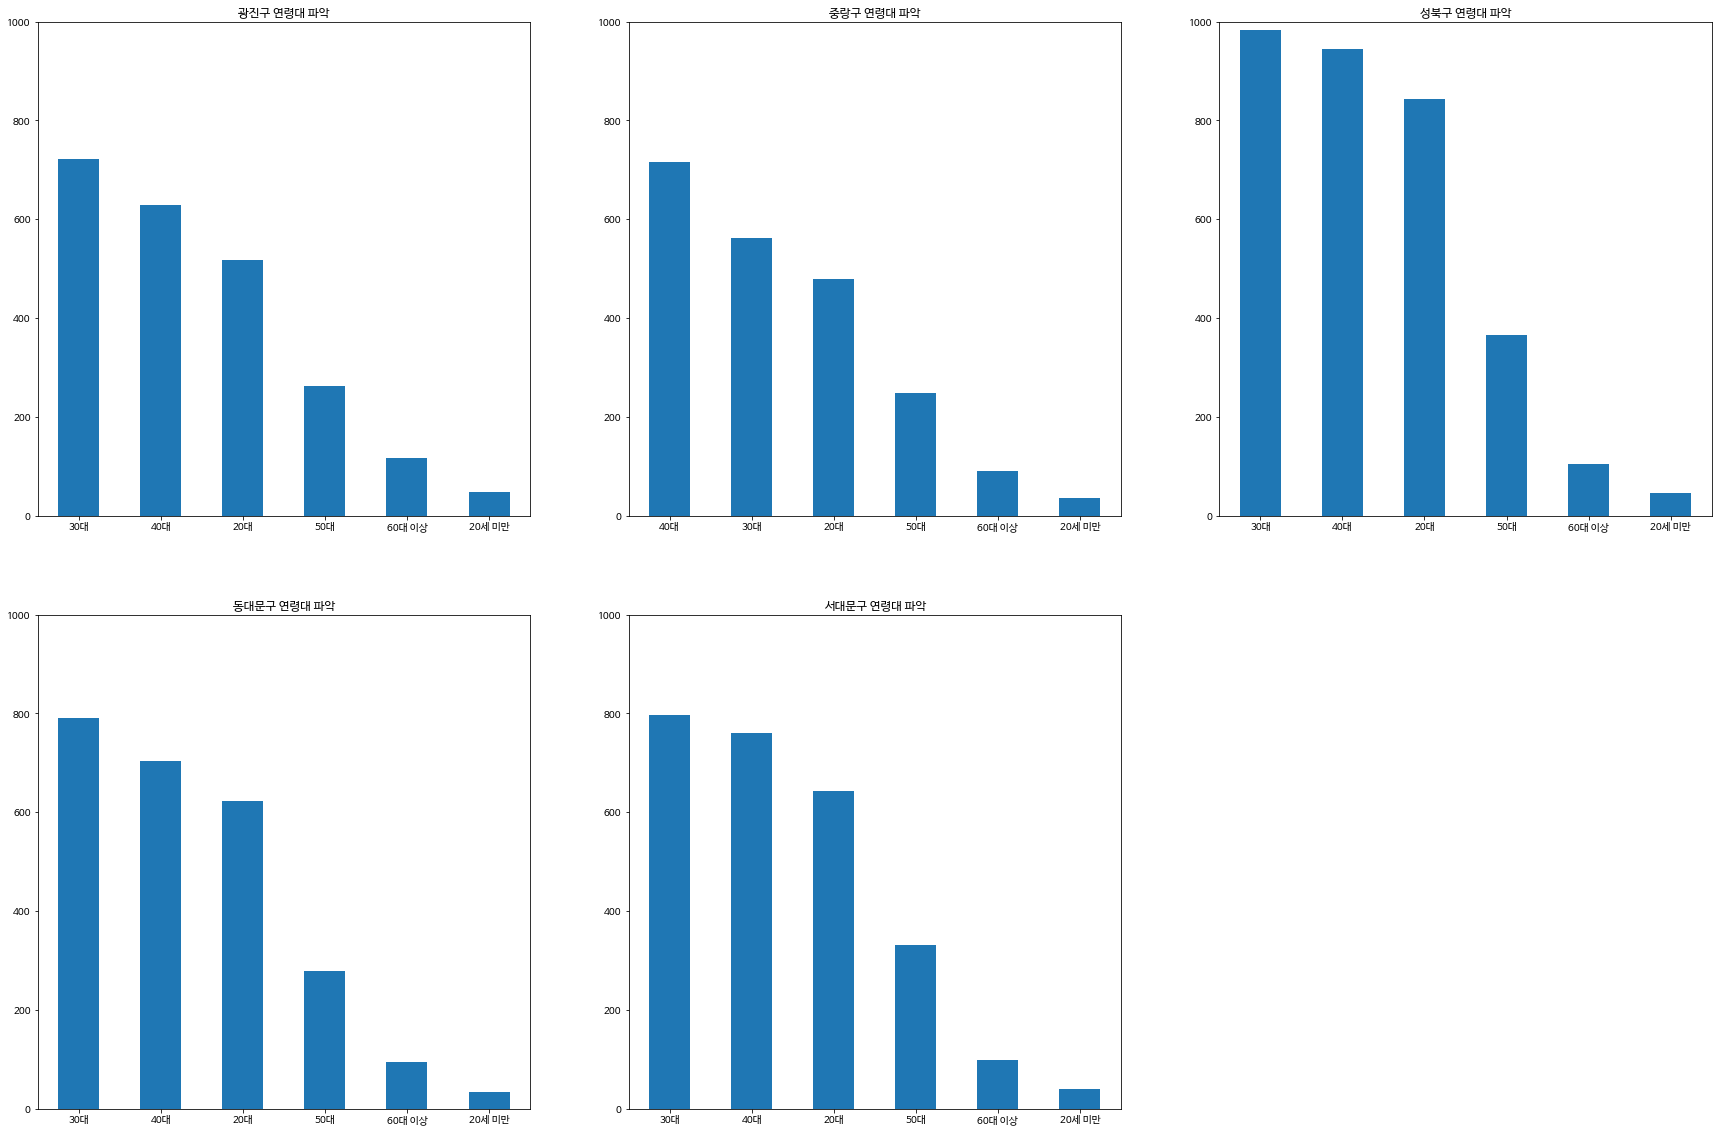

In [16]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,3,j+1)
    cluster0[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

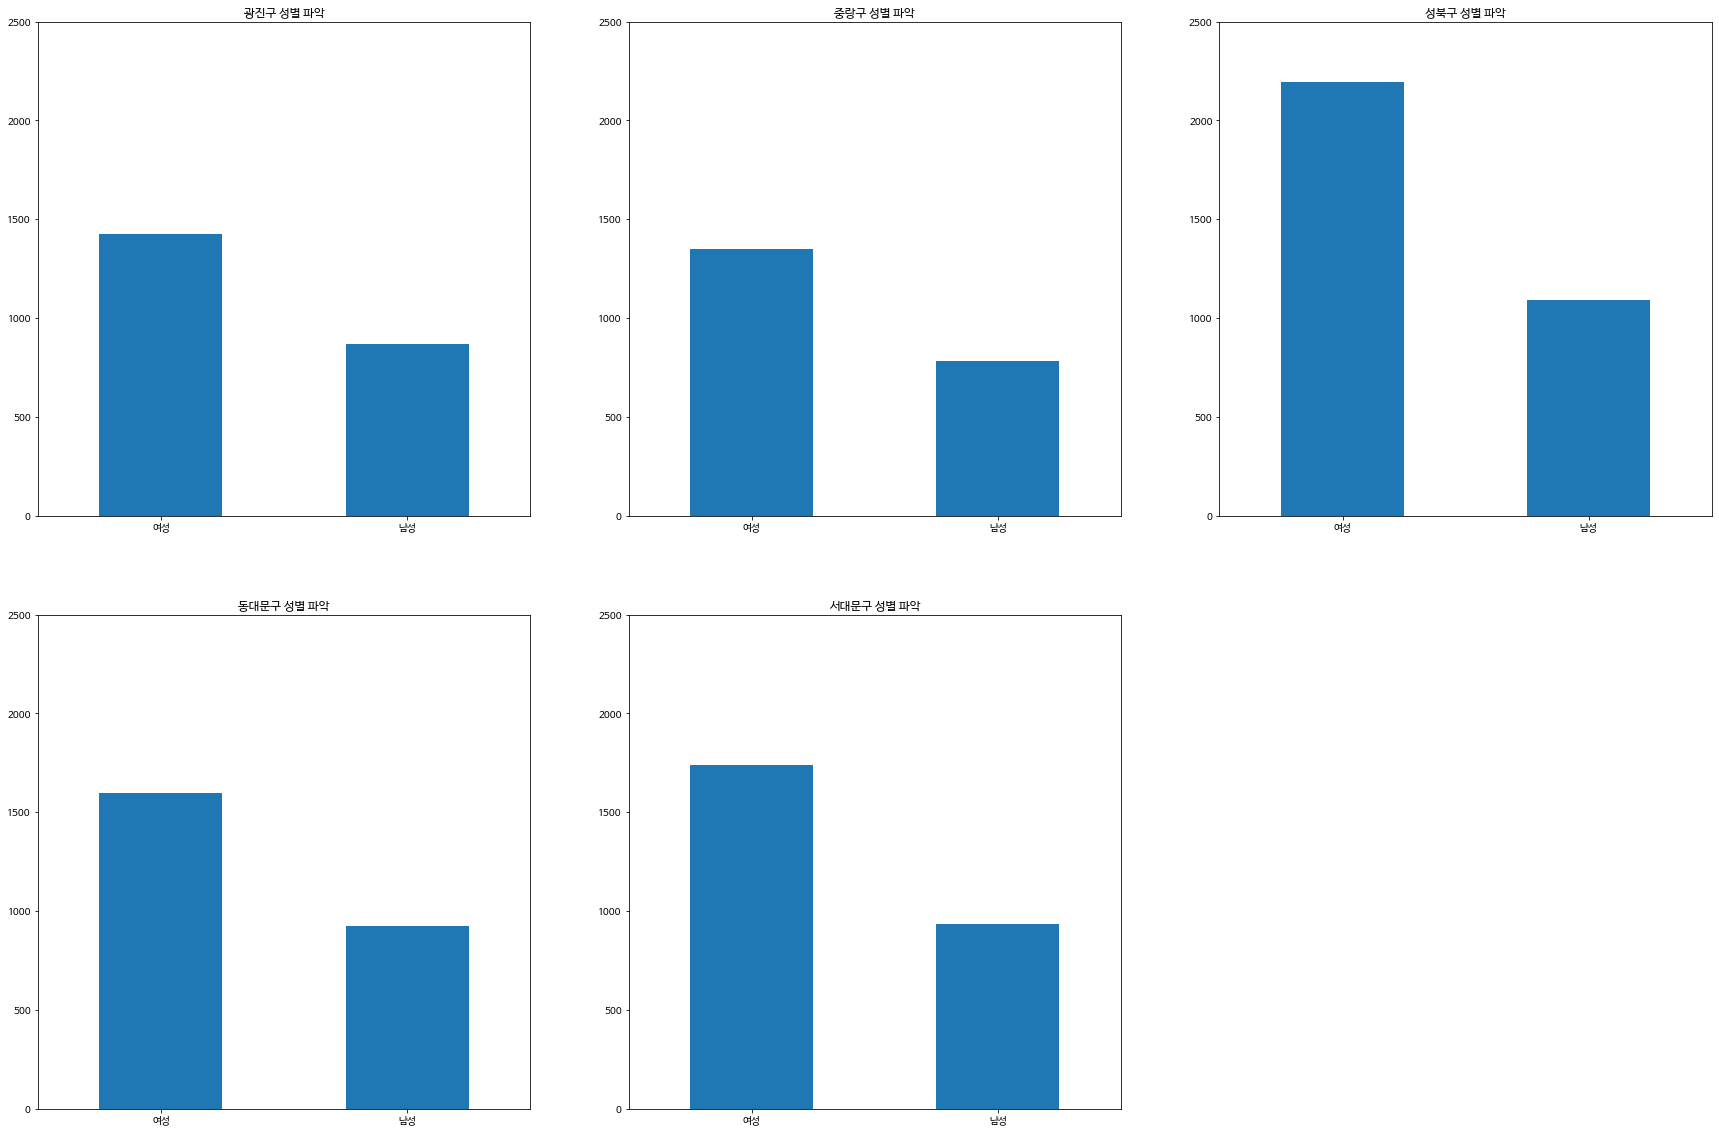

In [32]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,3,j+1)
    cluster0[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 2500])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

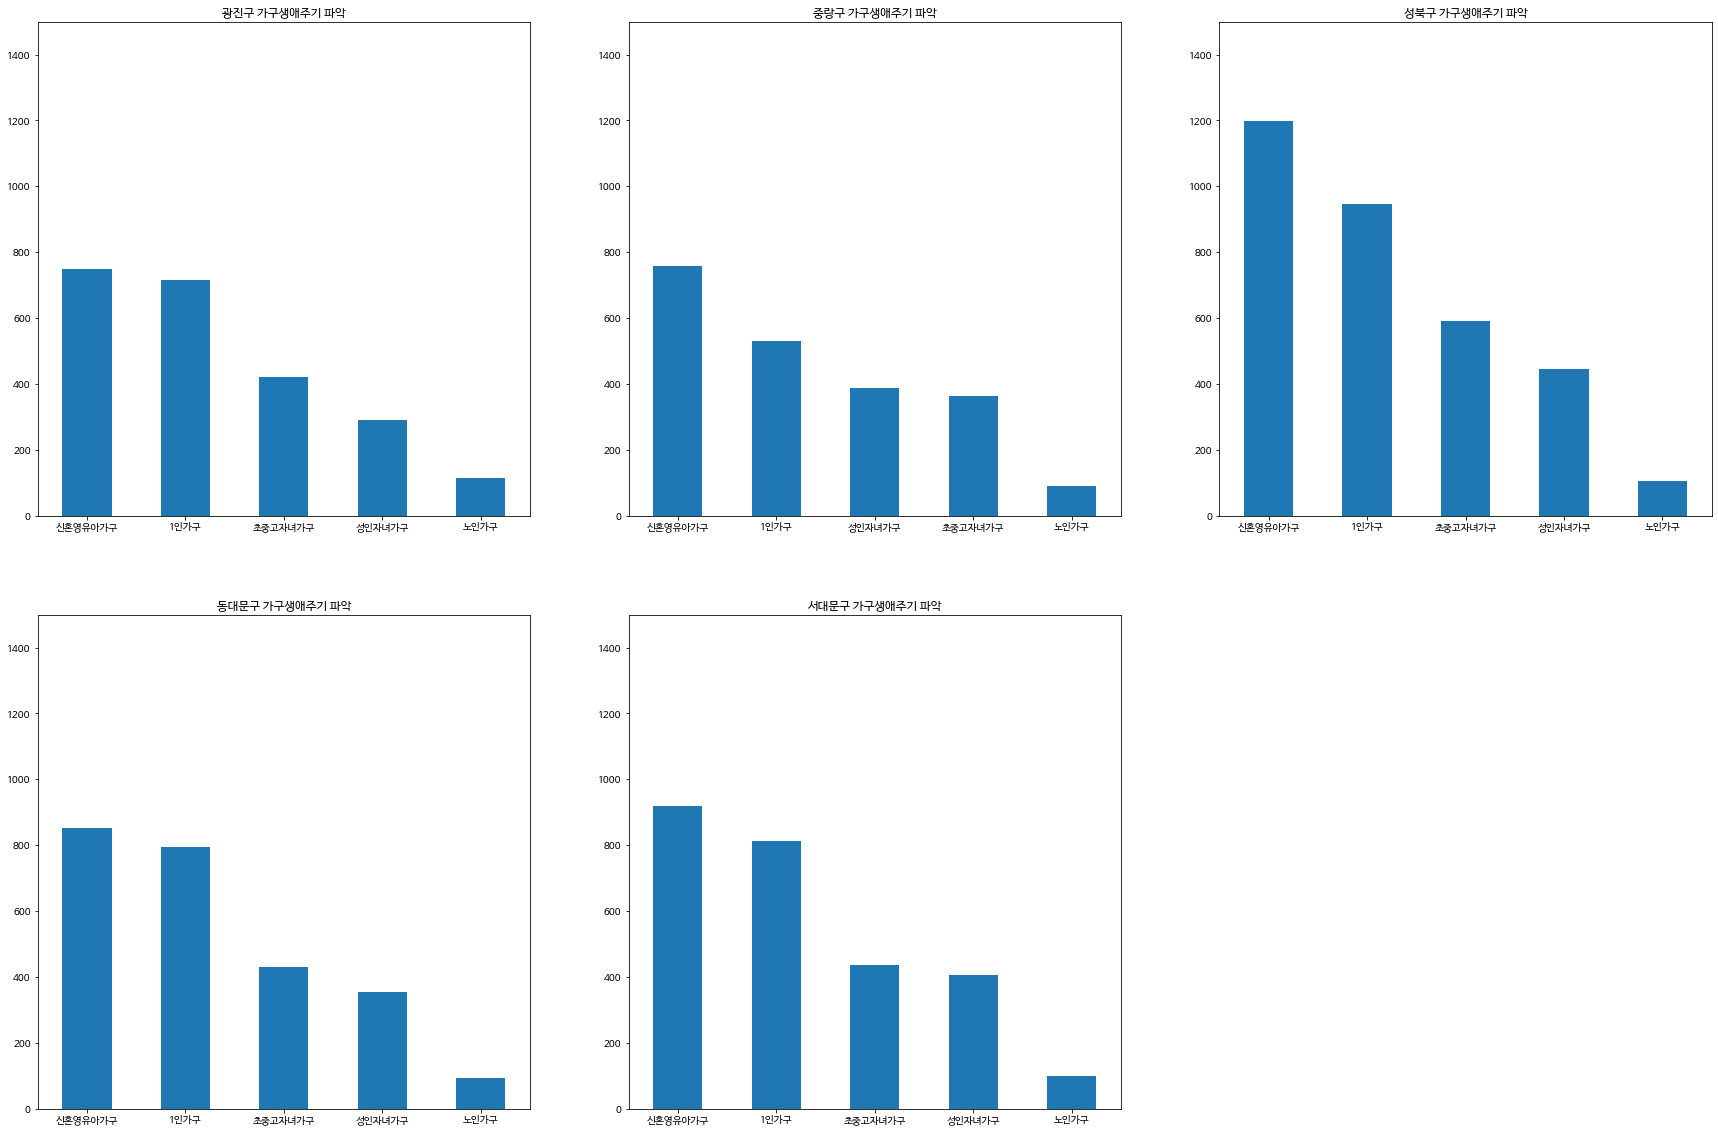

In [33]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,3,j+1)
    cluster0[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 1500])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

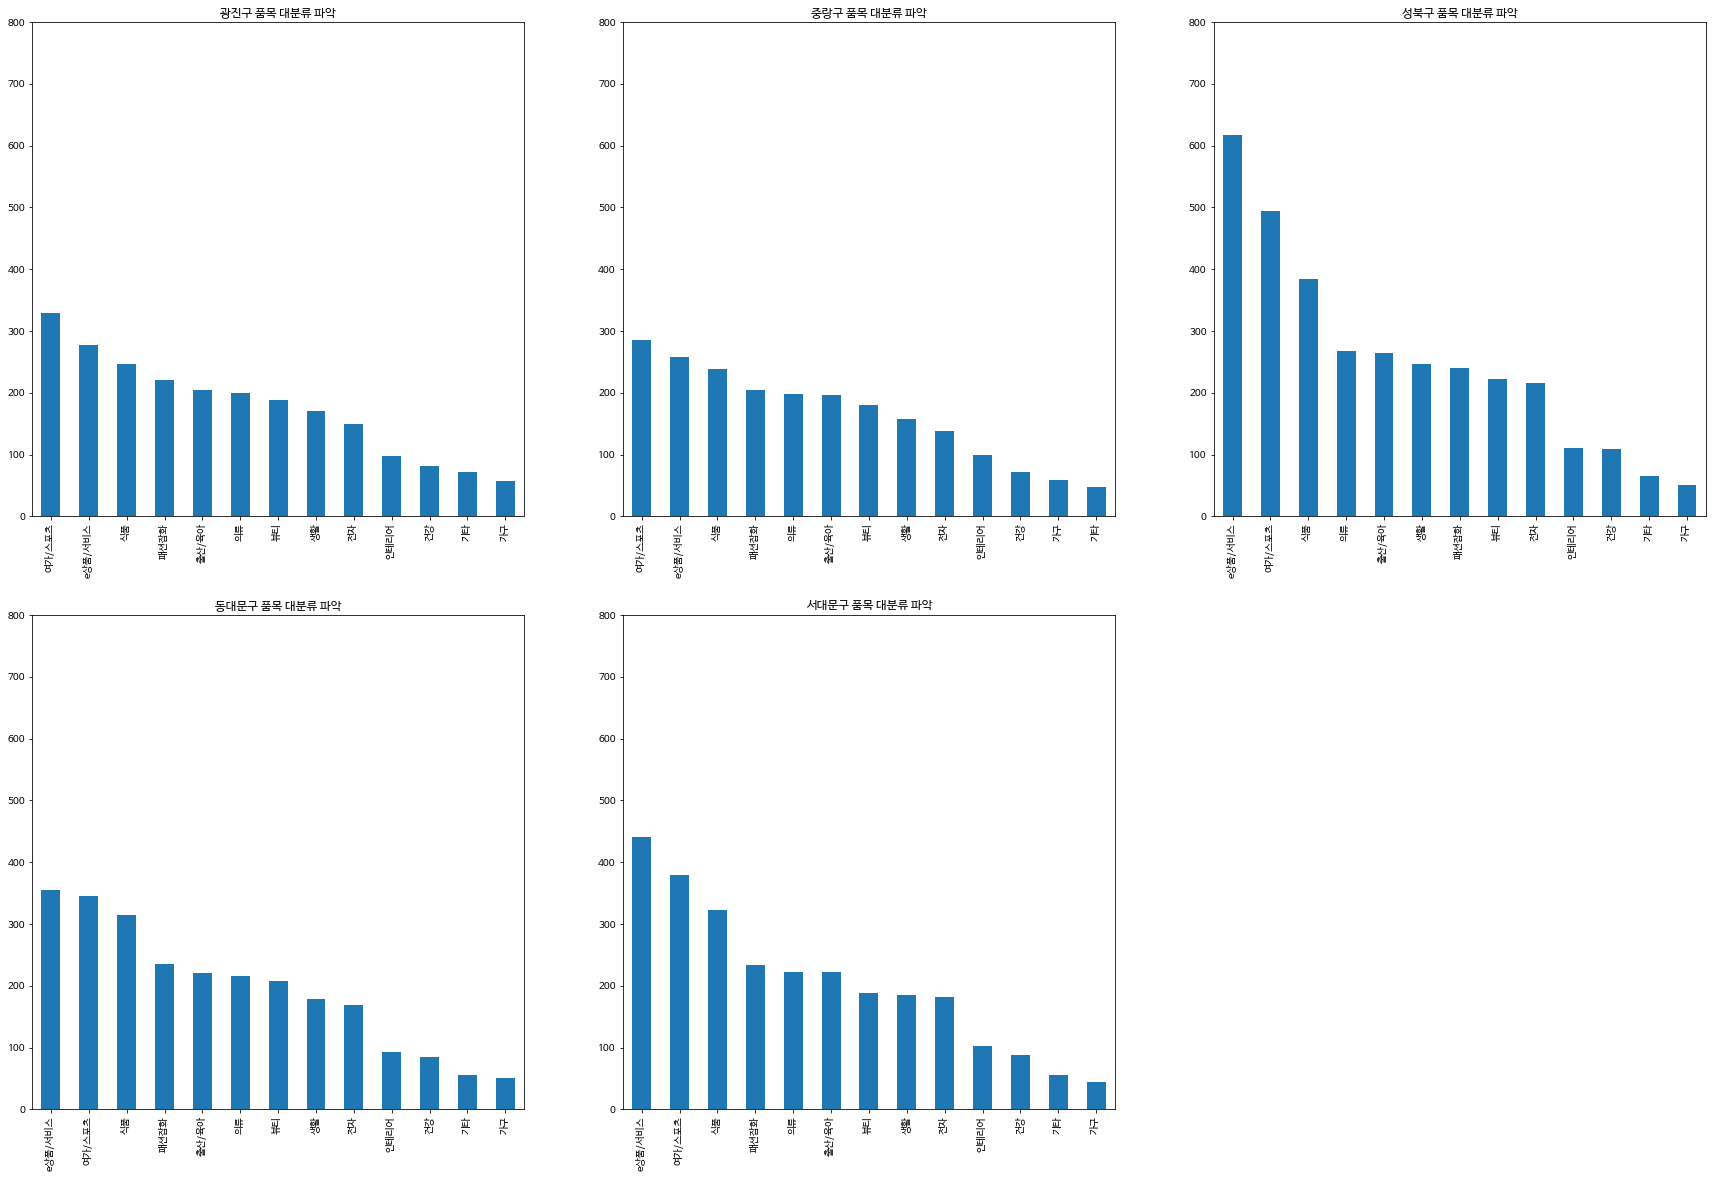

In [35]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,3,j+1)
    cluster0[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 800])
    plt.title(cluster0_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

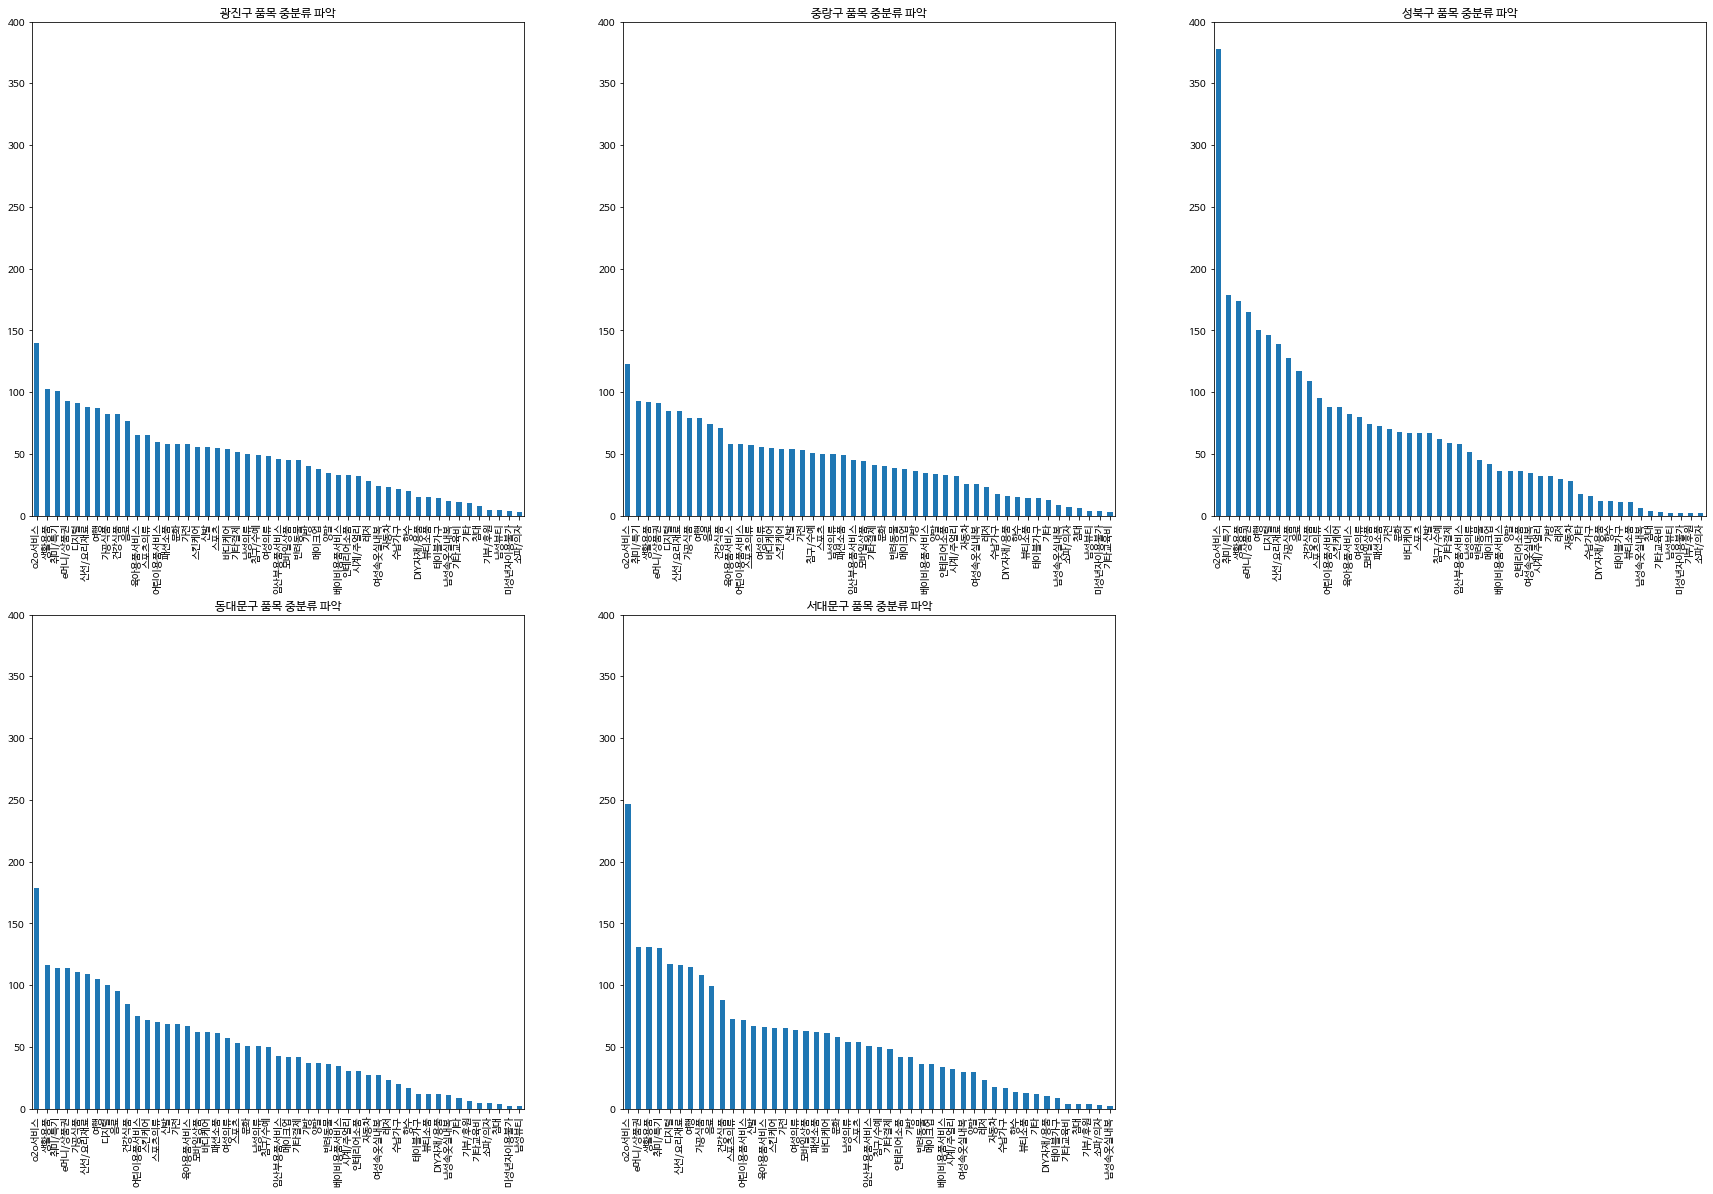

In [37]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,3,j+1)
    cluster0[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 400])
    plt.title(cluster0_list[j]+ ' 품목 중분류 파악')

plt.plot

In [21]:
# cluster == 1
df_1909_cluster1 = df_1909[df_1909['large_moneycount_cluster'] == 1]
cluster1_list = []
cluster1_list = df_1909_cluster1['고객소재지_시군구'].unique()

print(cluster1_list)

iscluster1 = []
for i in range(len(cluster1_list)):
    iscluster1.append(df_1909_cluster1['고객소재지_시군구'] == cluster1_list[i])
    
cluster1 = []
for i in range(len(cluster1_list)):
    cluster1.append(df_1909_cluster1[iscluster1[i]])

['송파구' '강서구' '강남구' '관악구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

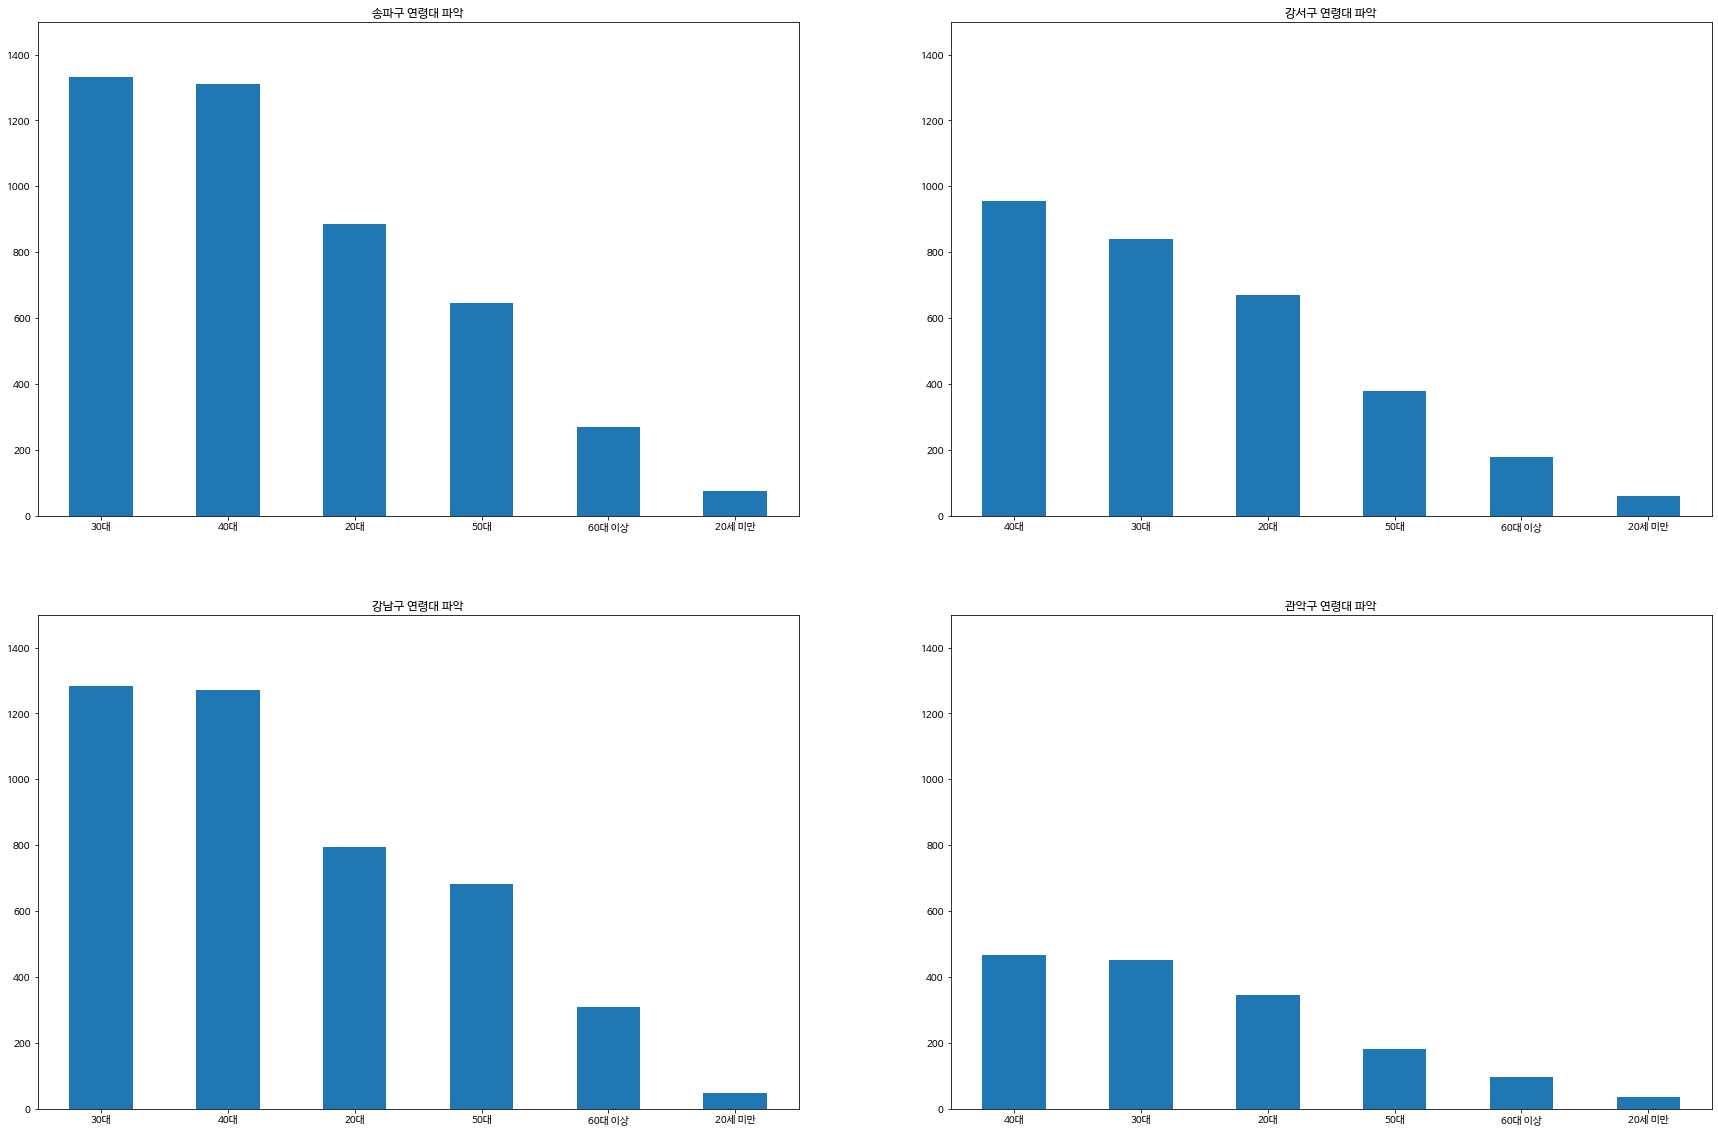

In [38]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(2,2,j+1)
    cluster1[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 1500])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

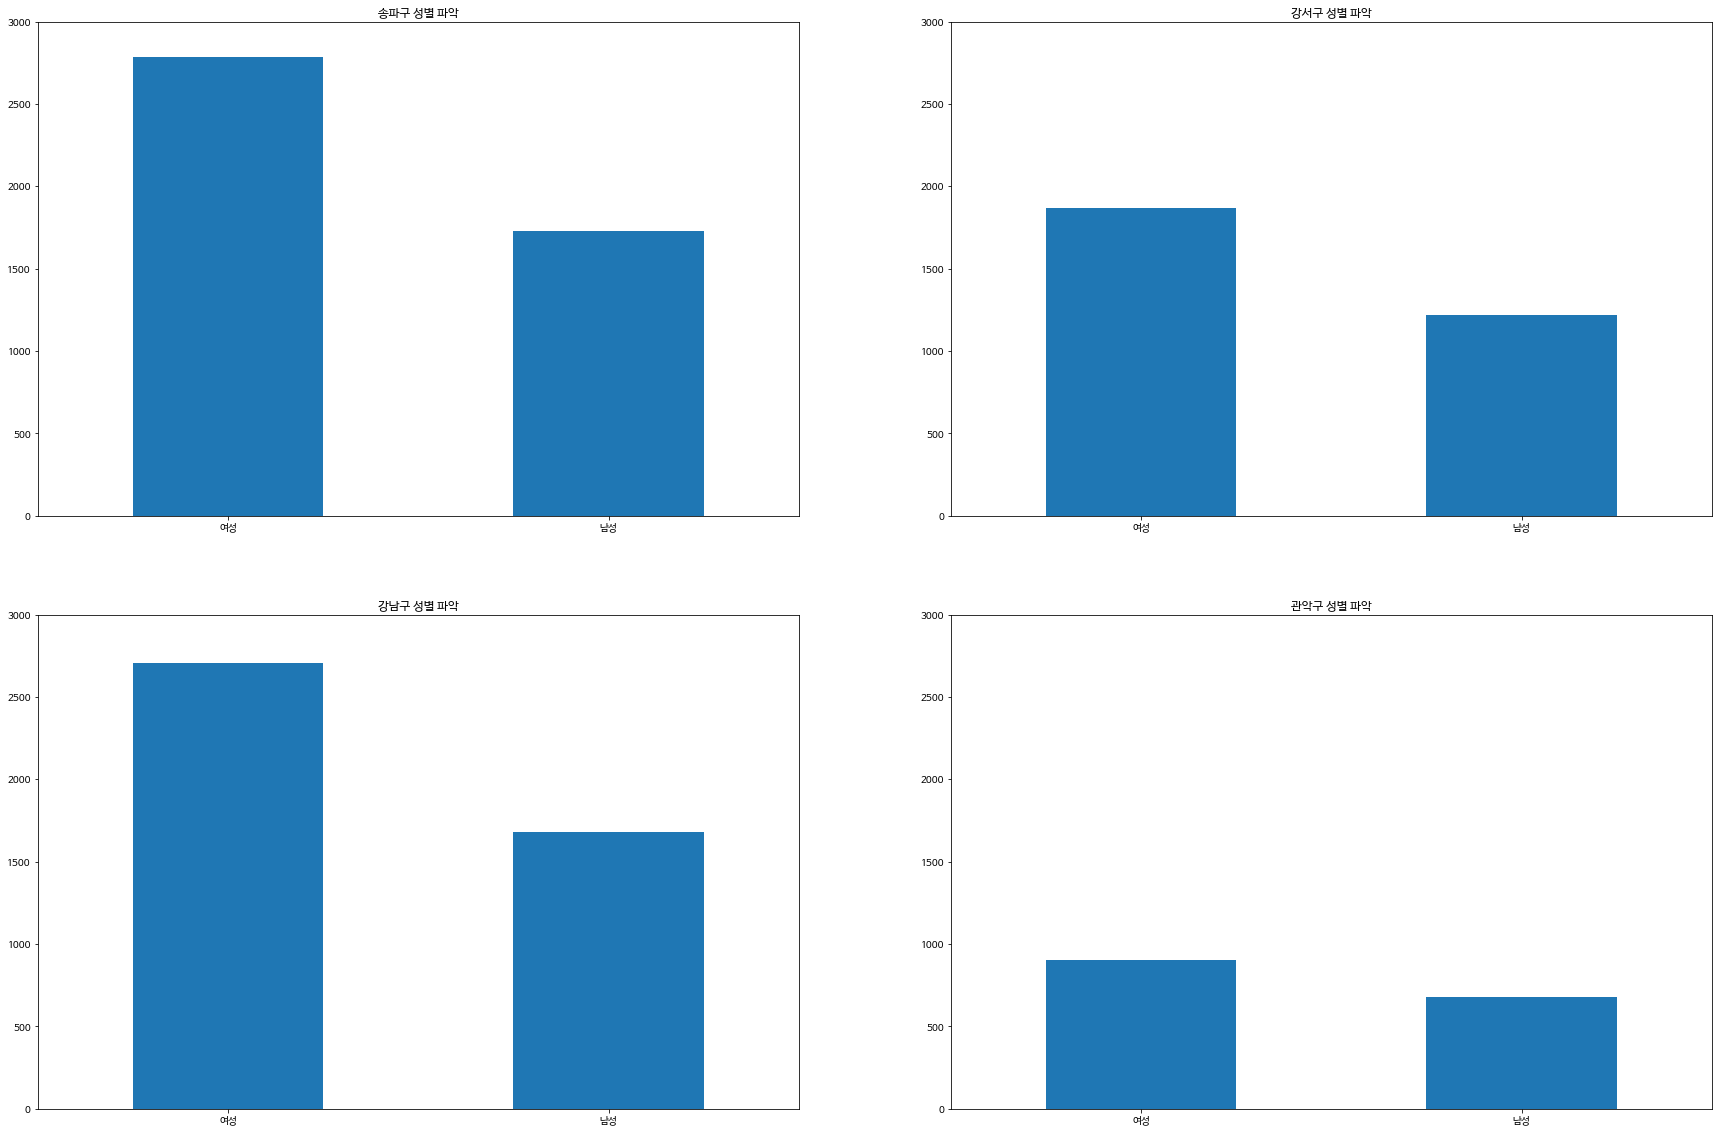

In [39]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(2,2,j+1)
    cluster1[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 3000])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

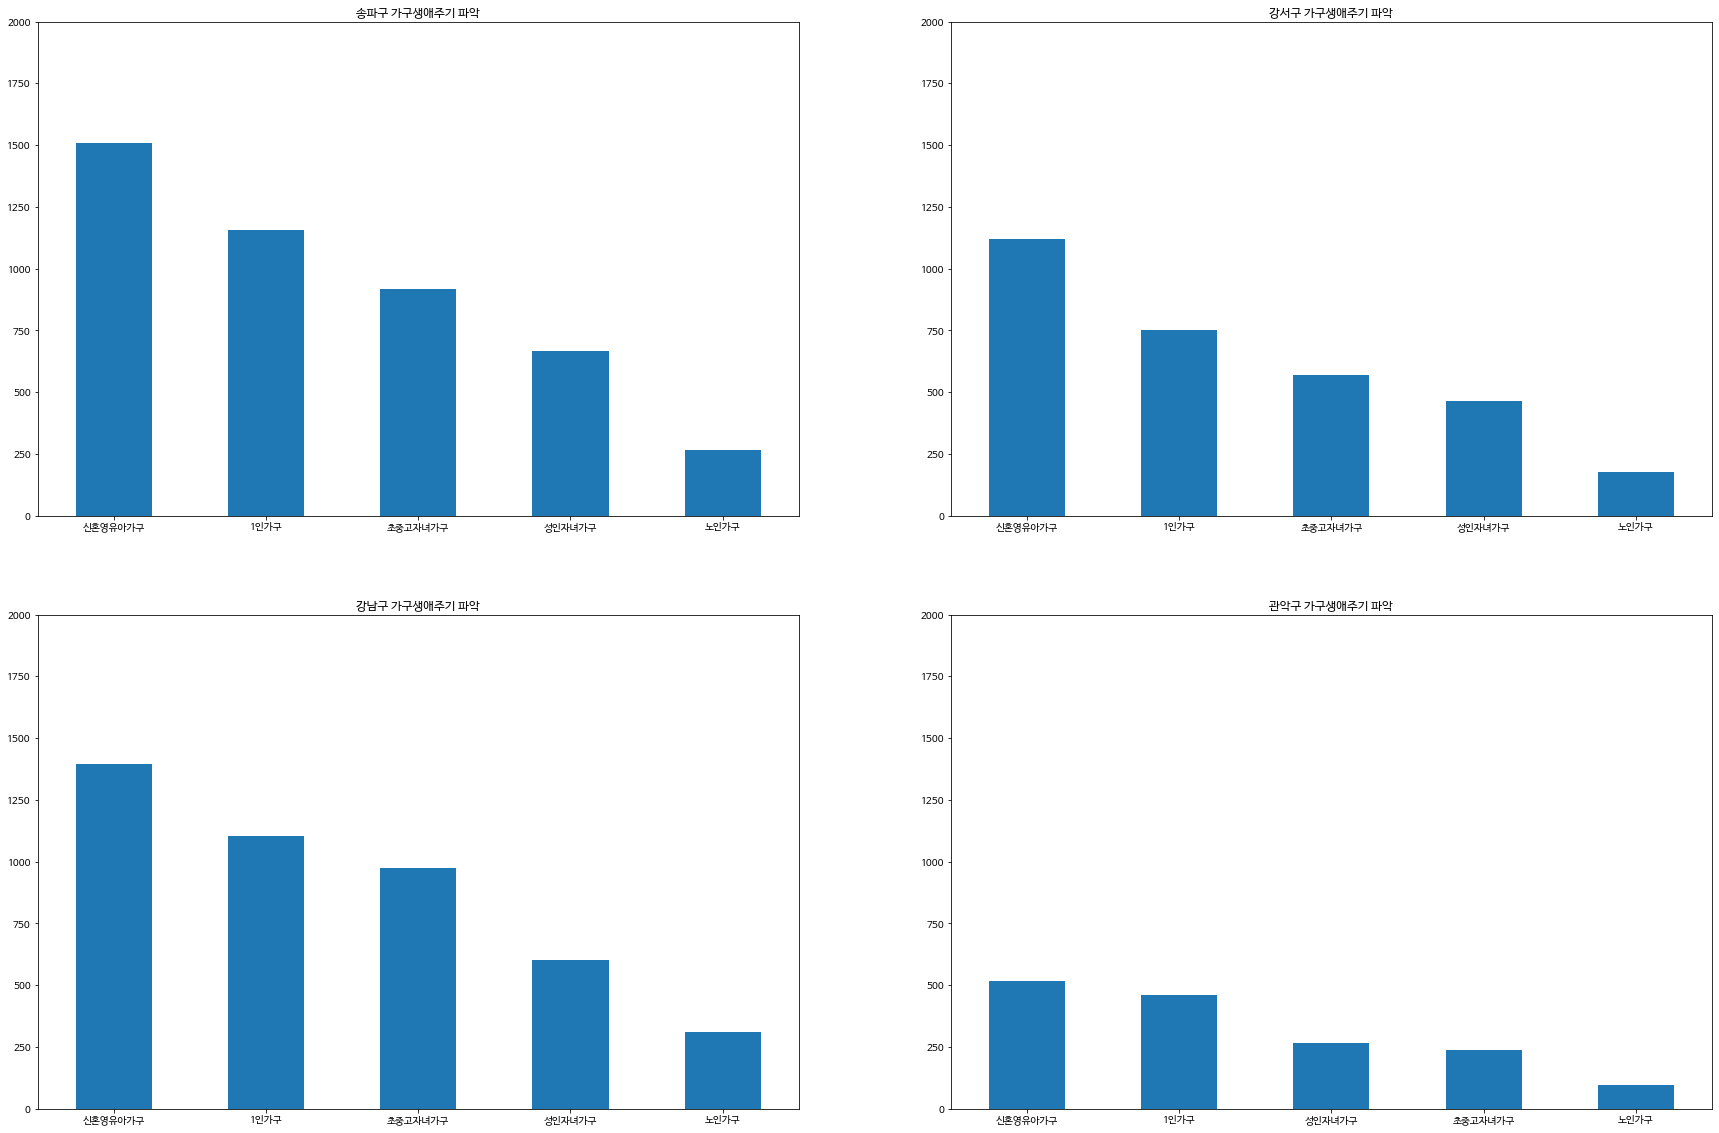

In [42]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(2,2,j+1)
    cluster1[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

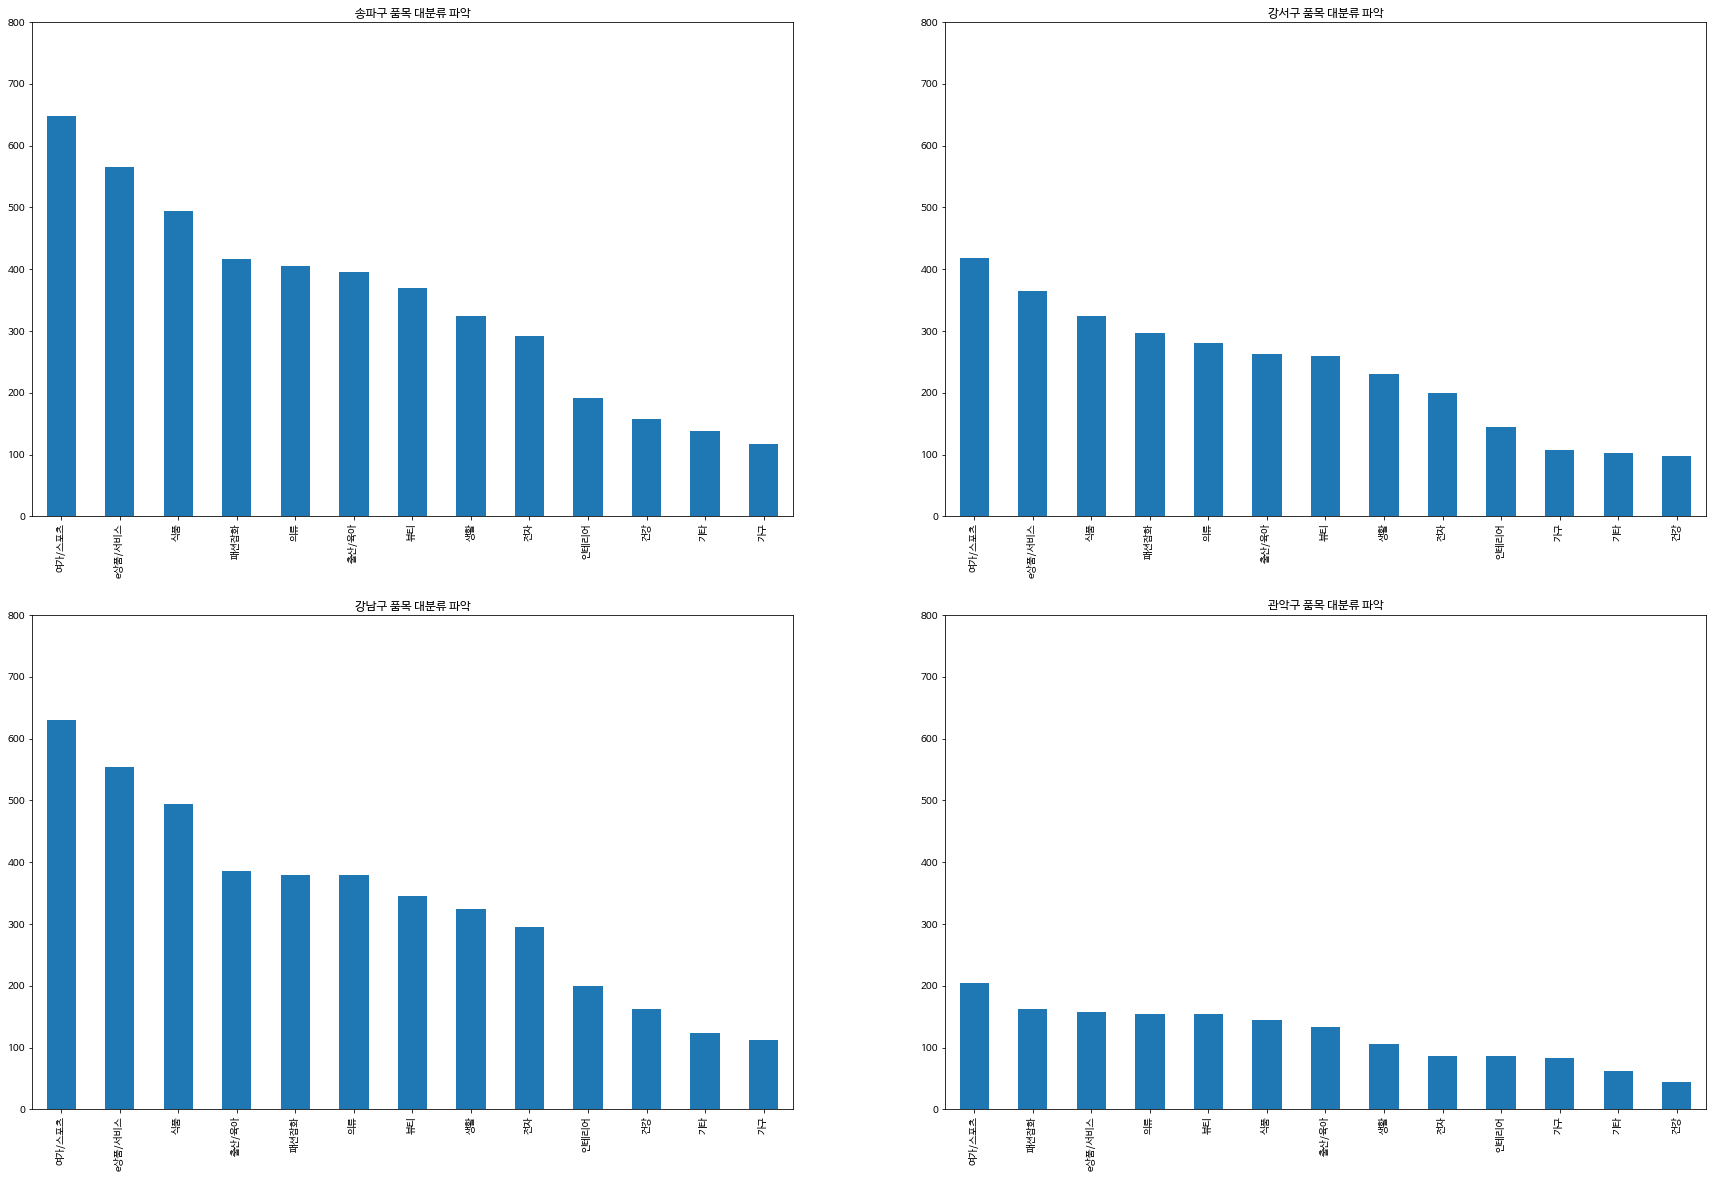

In [44]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(2,2,j+1)
    cluster1[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 800])
    plt.title(cluster1_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

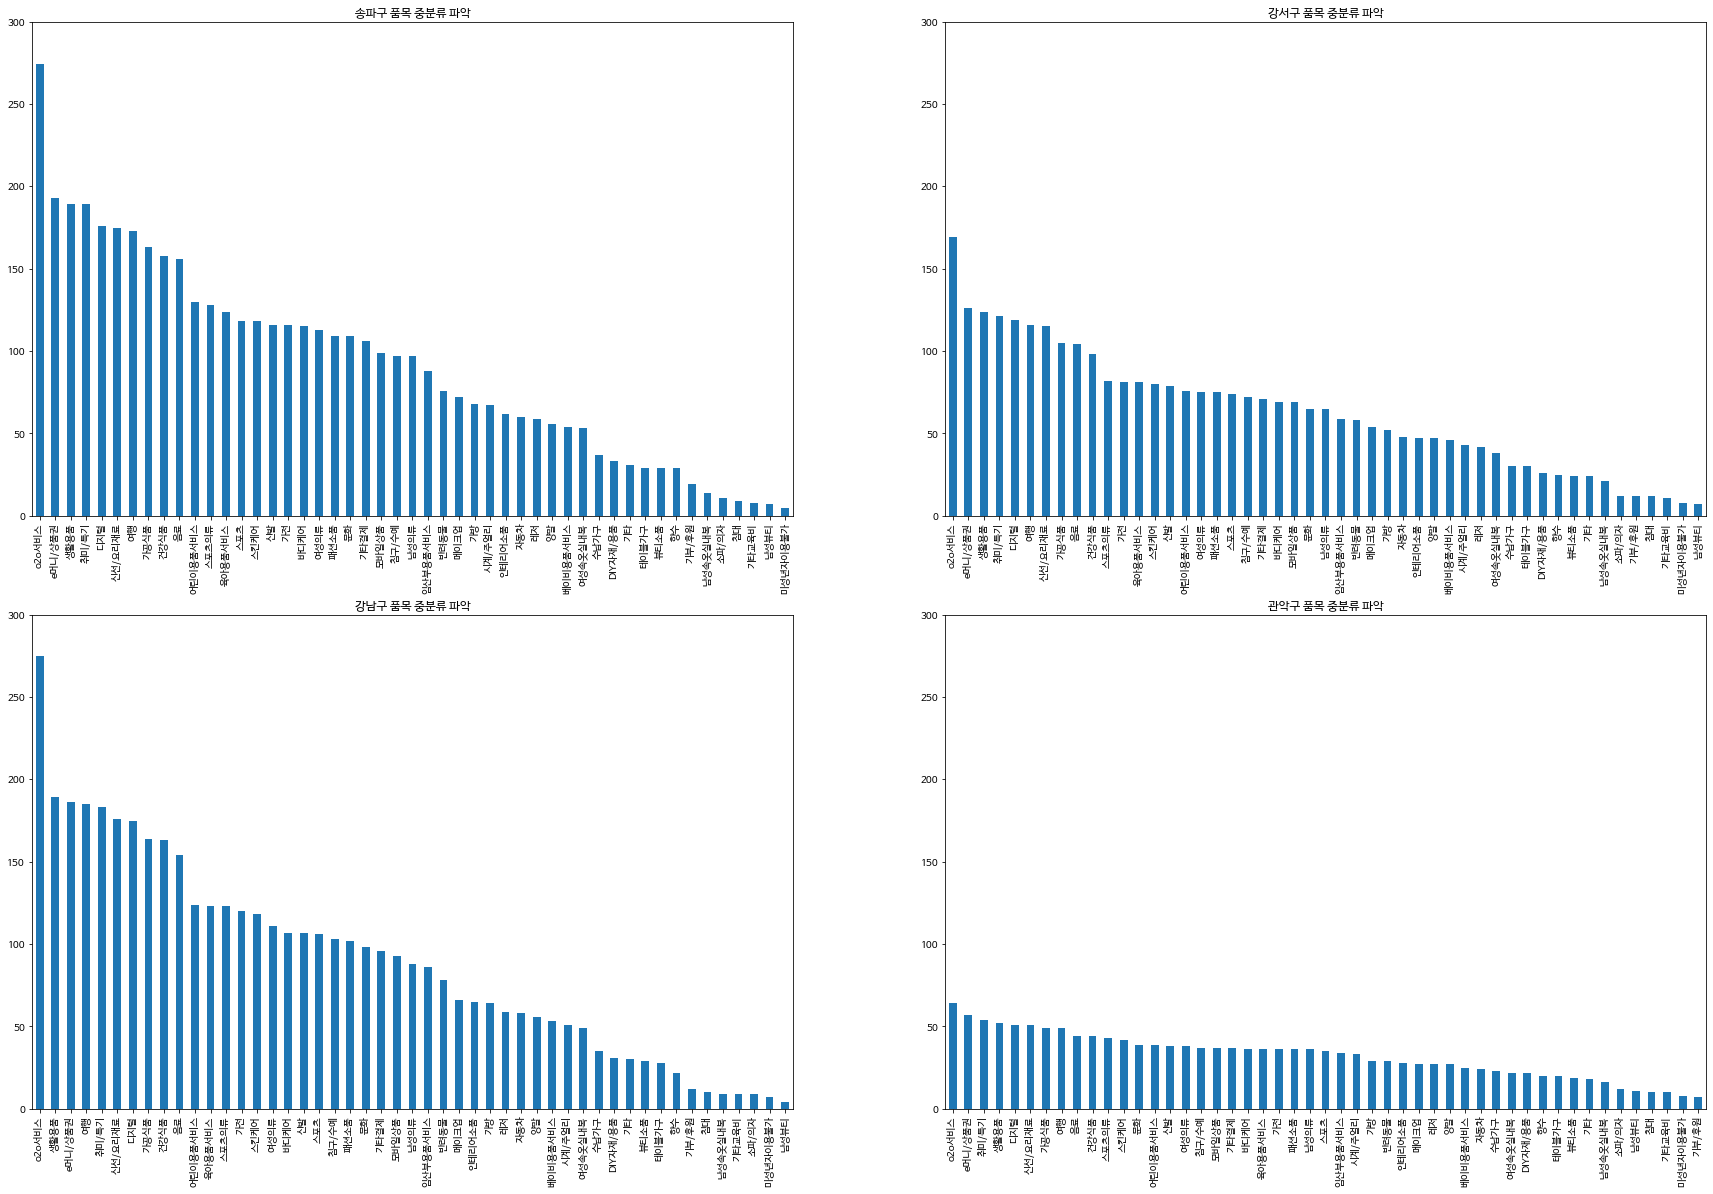

In [26]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(2,2,j+1)
    cluster1[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster1_list[j]+ ' 품목 중분류 파악')

plt.plot

In [27]:
# cluster == 2
df_1909_cluster2 = df_1909[df_1909['large_moneycount_cluster'] == 2]
cluster2_list = []
cluster2_list = df_1909_cluster2['고객소재지_시군구'].unique()

print(cluster2_list)

iscluster2 = []
for i in range(len(cluster2_list)):
    iscluster2.append(df_1909_cluster2['고객소재지_시군구'] == cluster2_list[i])
    
cluster2 = []
for i in range(len(cluster2_list)):
    cluster2.append(df_1909_cluster2[iscluster2[i]])

['강북구' '도봉구' '금천구' '성동구' '용산구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

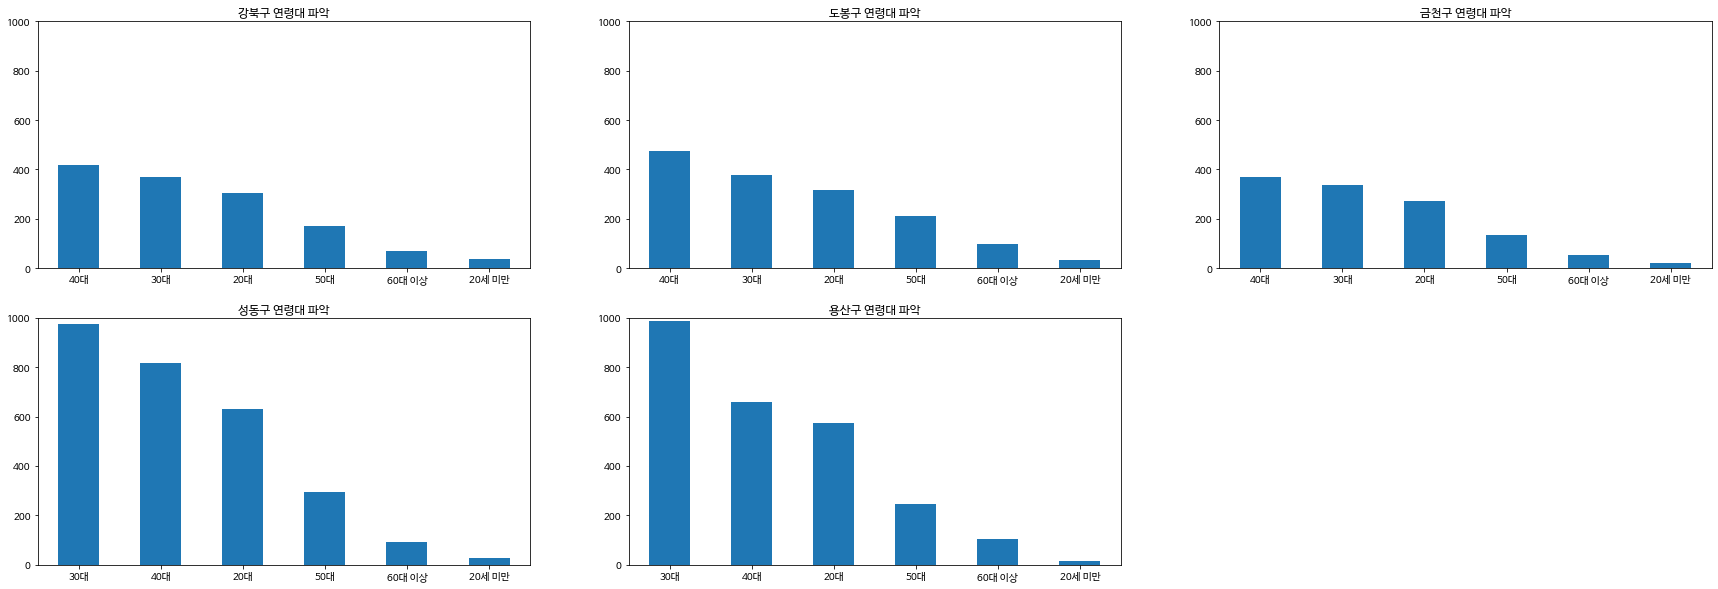

In [46]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(2,3,j+1)
    cluster2[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

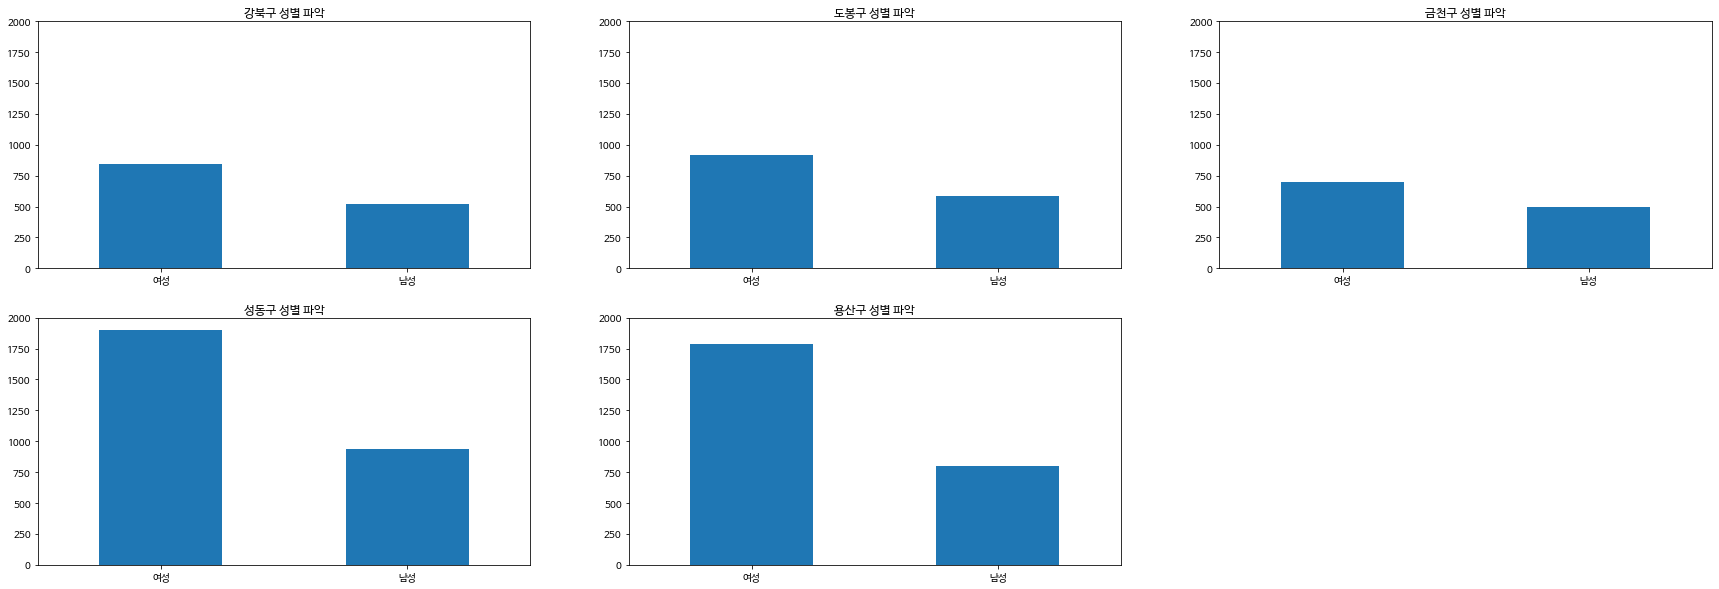

In [50]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(2,3,j+1)
    cluster2[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

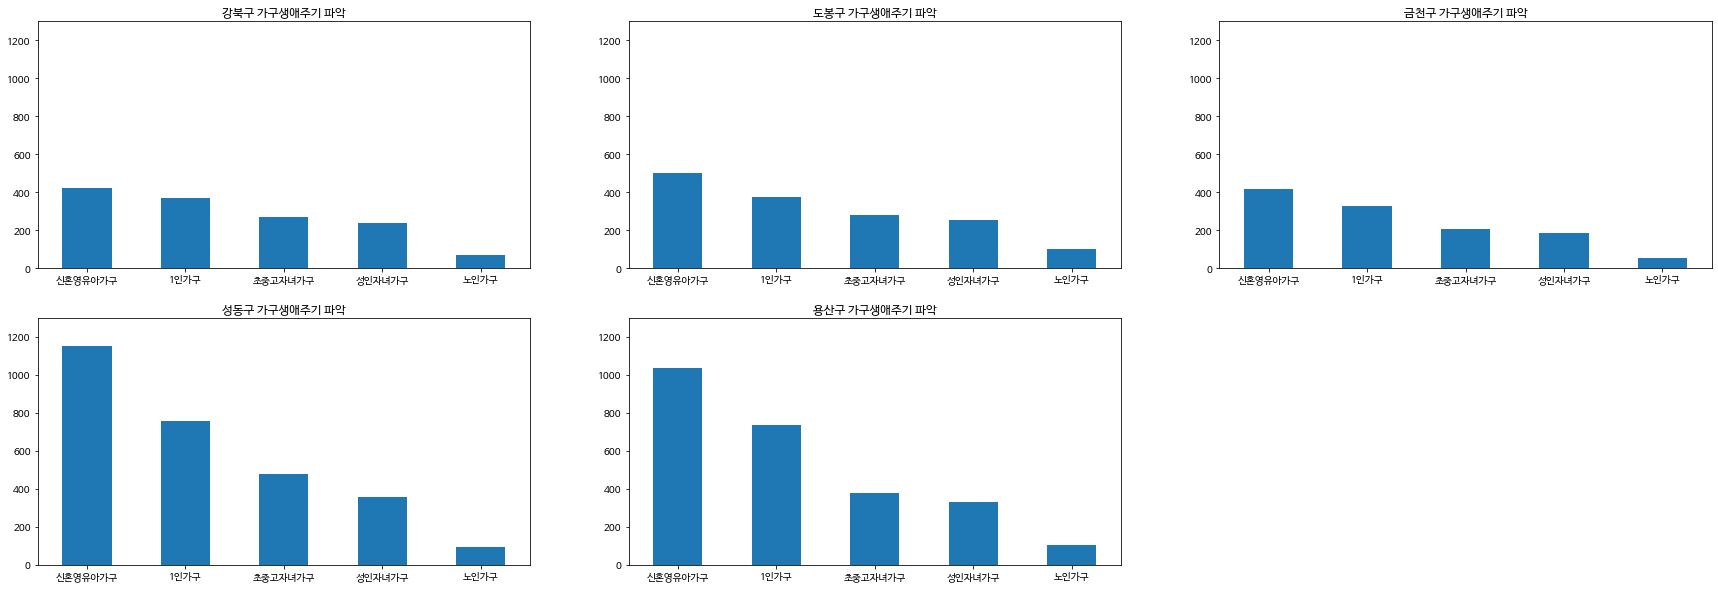

In [53]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(2,3,j+1)
    cluster2[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 1300])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

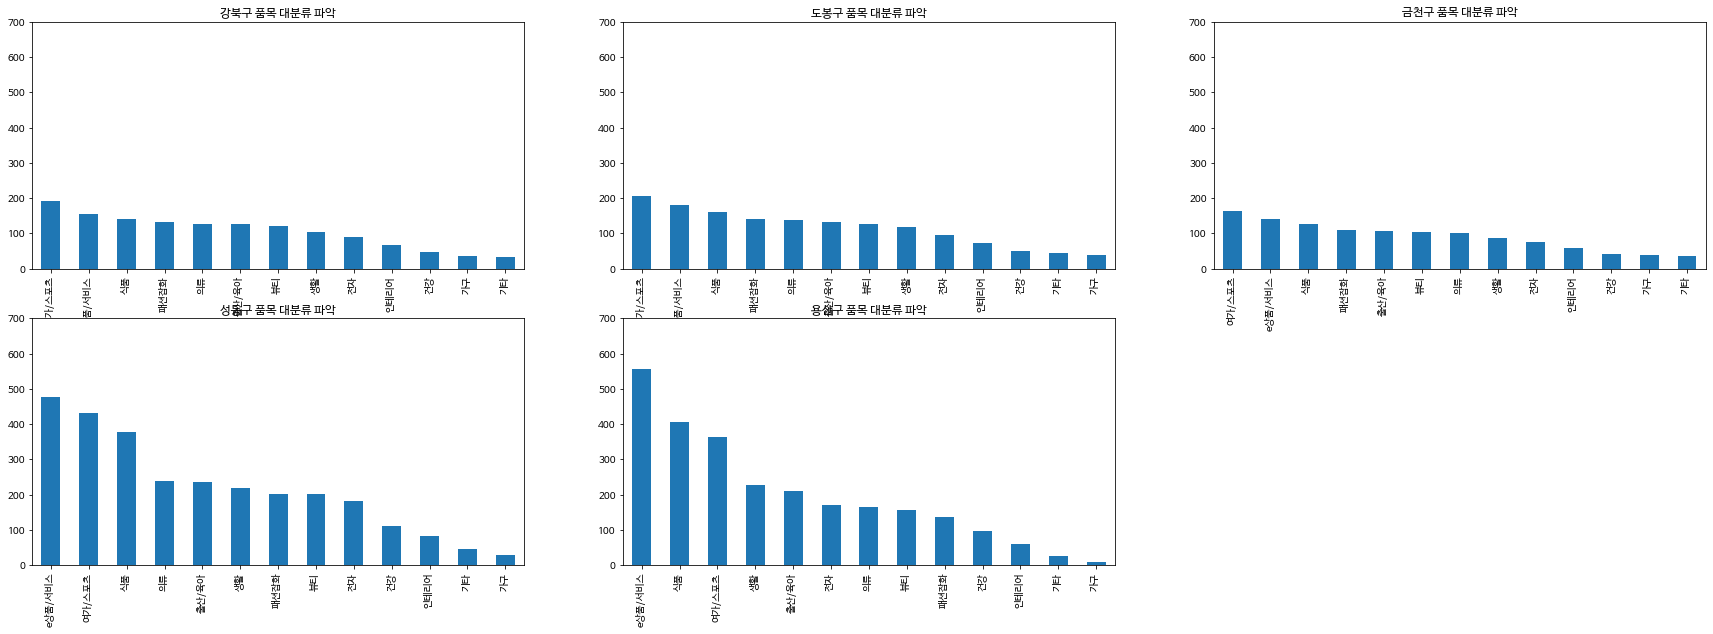

In [56]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(2,3,j+1)
    cluster2[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 700])
    plt.title(cluster2_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

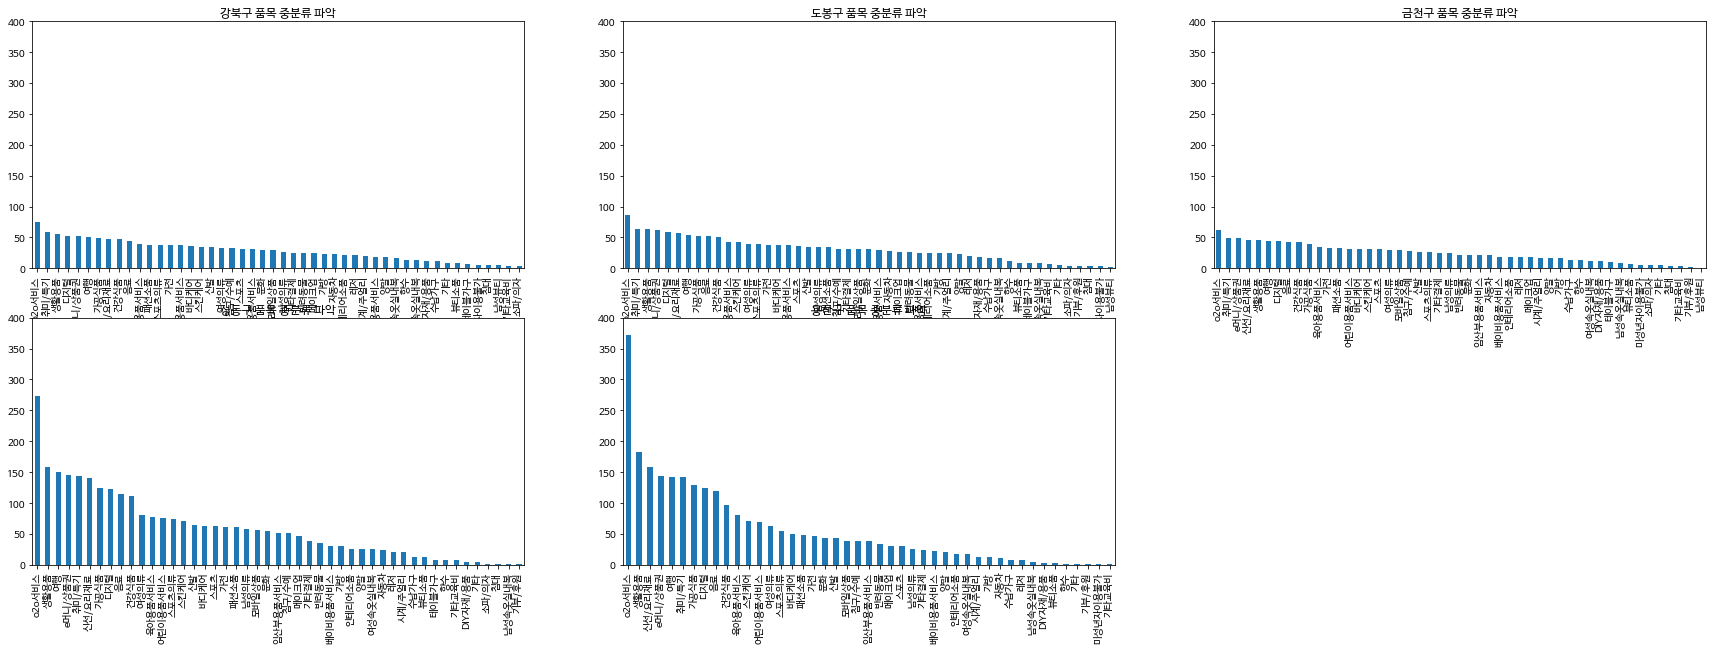

In [58]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(2,3,j+1)
    cluster2[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 400])
    plt.title(cluster2_list[j]+ ' 품목 중분류 파악')

plt.plot

In [59]:
# cluster == 3
df_1909_cluster3 = df_1909[df_1909['large_moneycount_cluster'] == 3]
cluster3_list = []
cluster3_list = df_1909_cluster3['고객소재지_시군구'].unique()

print(cluster3_list)

iscluster3 = []
for i in range(len(cluster3_list)):
    iscluster3.append(df_1909_cluster3['고객소재지_시군구'] == cluster3_list[i])
    
cluster3 = []
for i in range(len(cluster3_list)):
    cluster3.append(df_1909_cluster3[iscluster3[i]])

['강동구' '양천구' '동작구' '은평구' '구로구' '마포구' '노원구' '영등포구' '서초구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

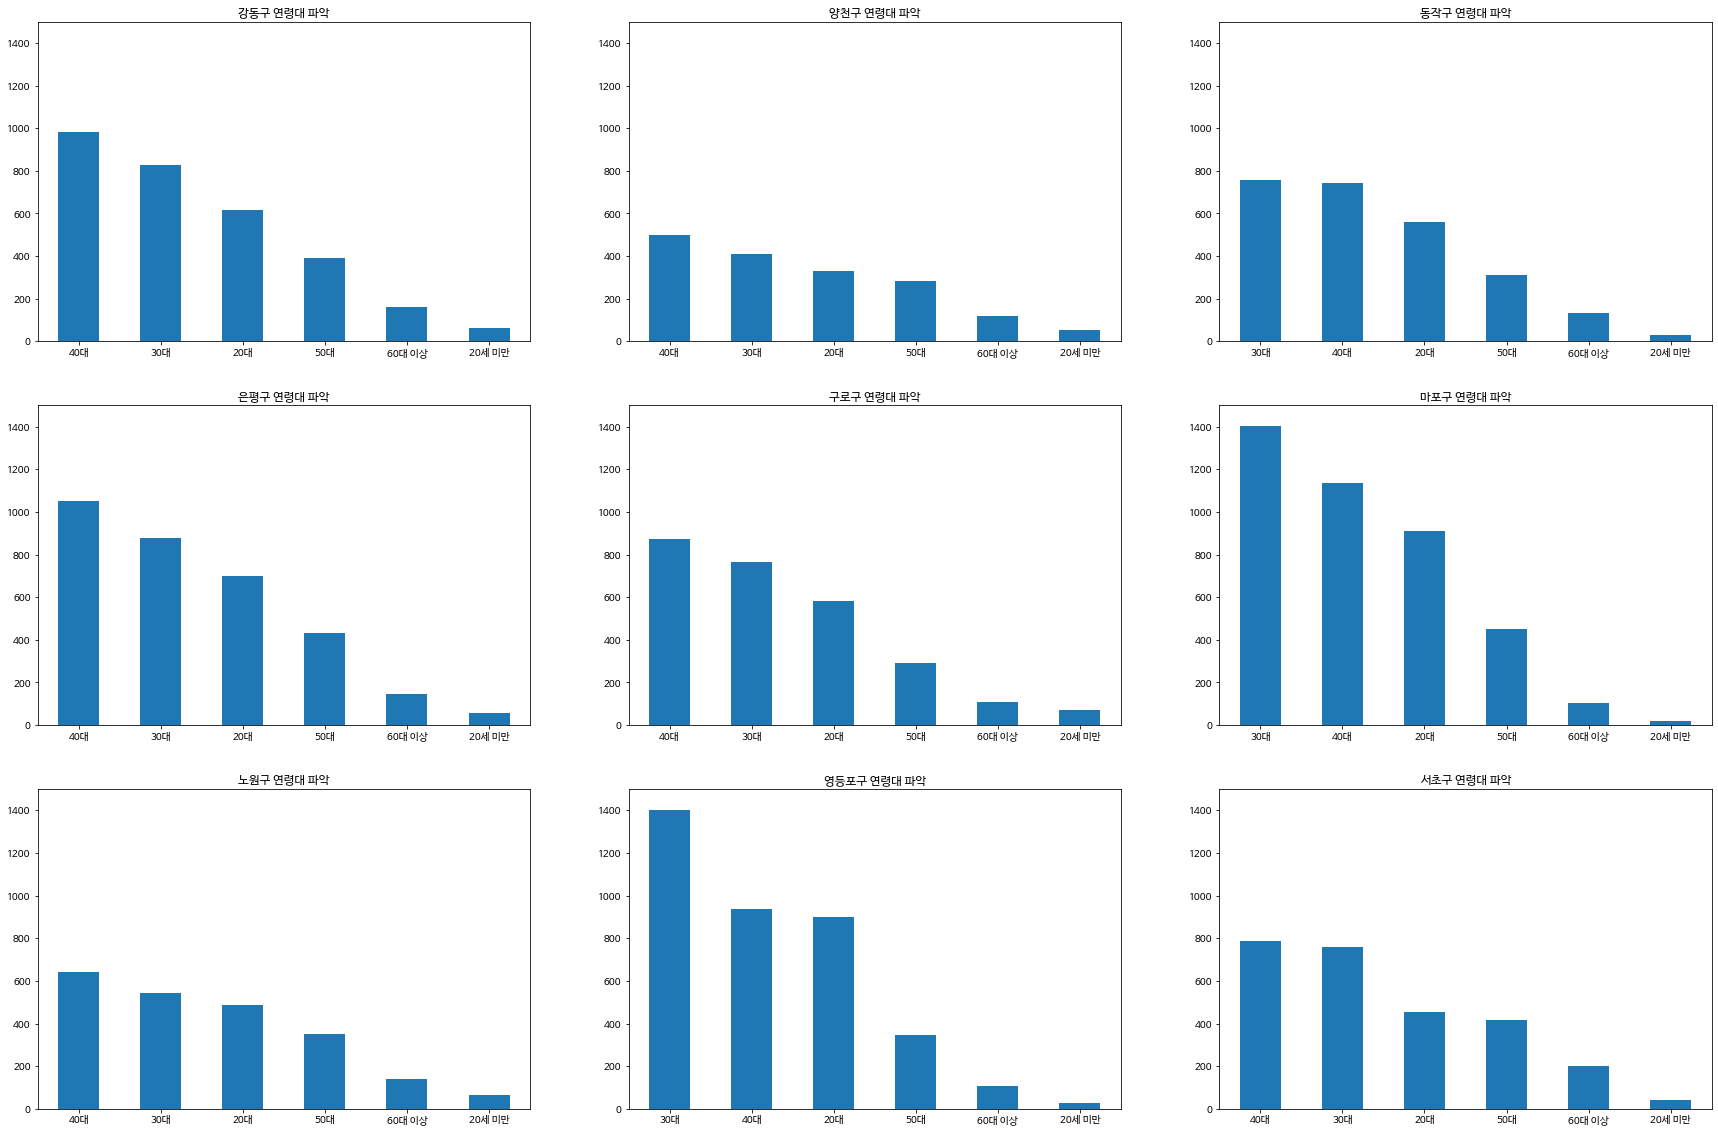

In [71]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(3,3,j+1)
    cluster3[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 1500])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

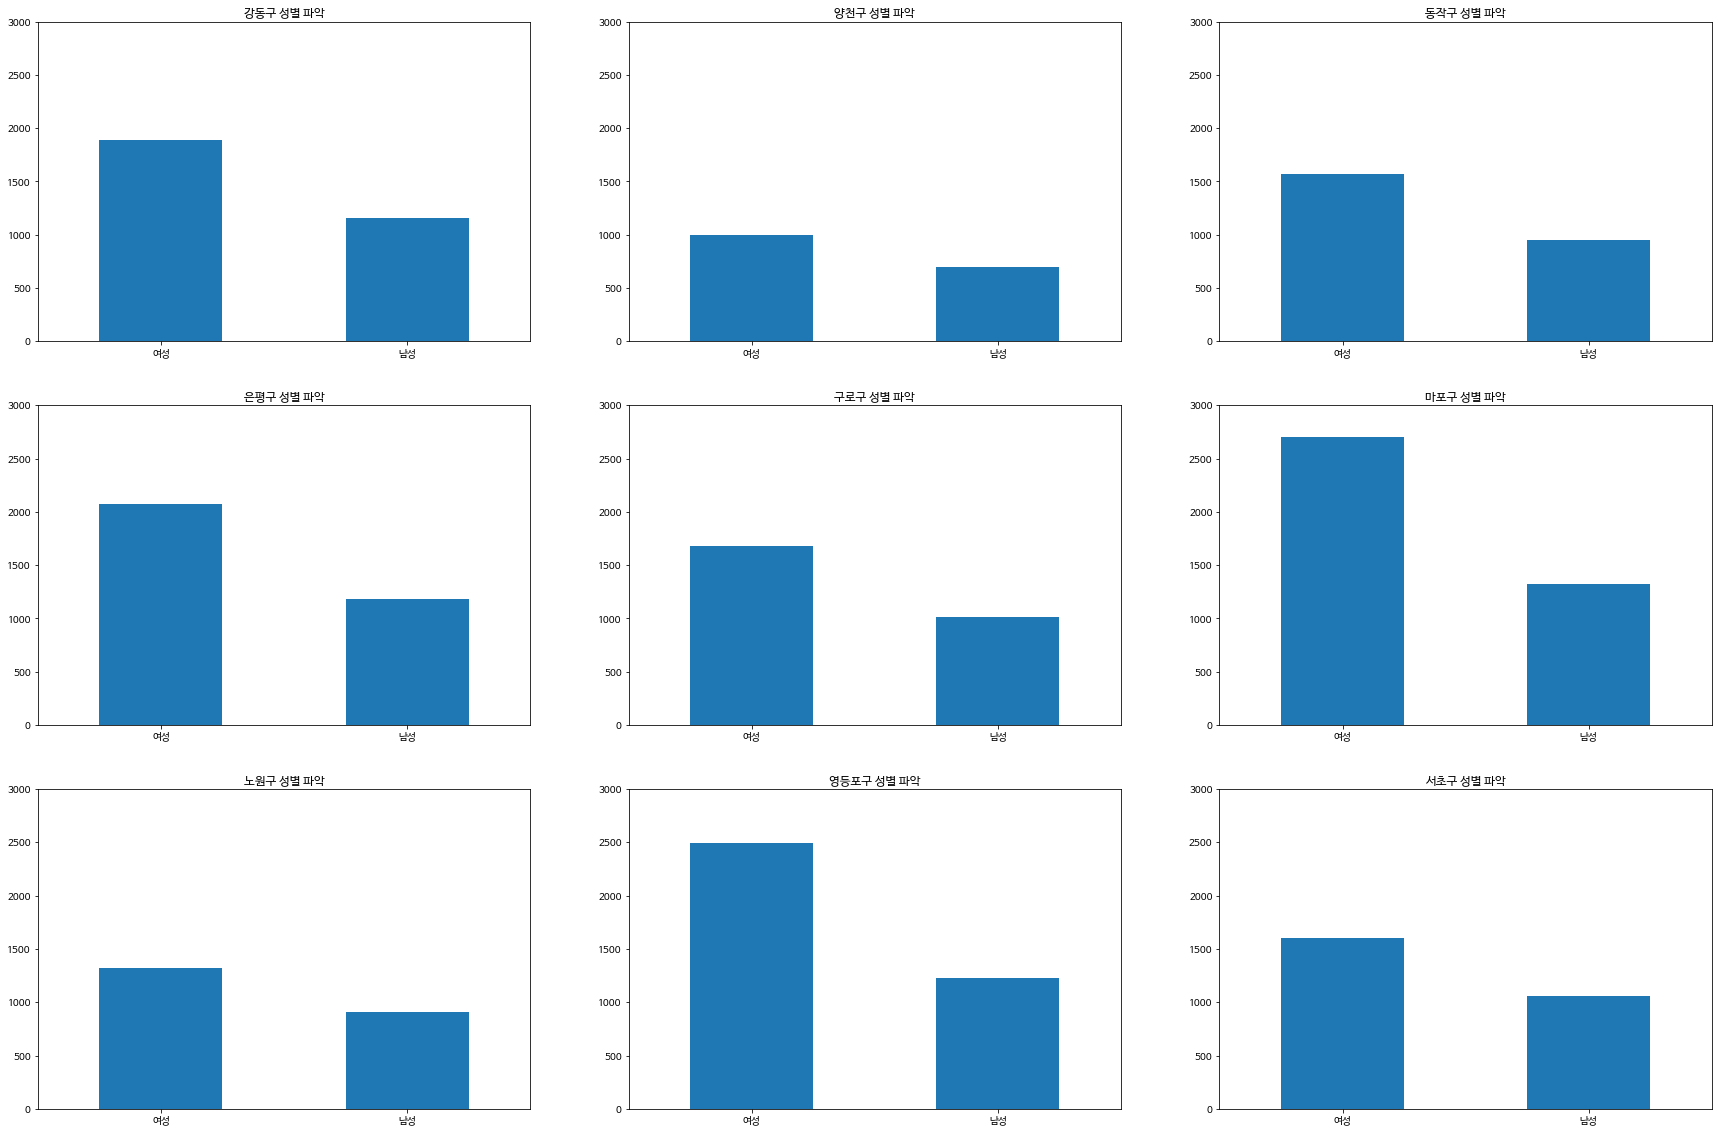

In [73]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(3,3,j+1)
    cluster3[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 3000])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

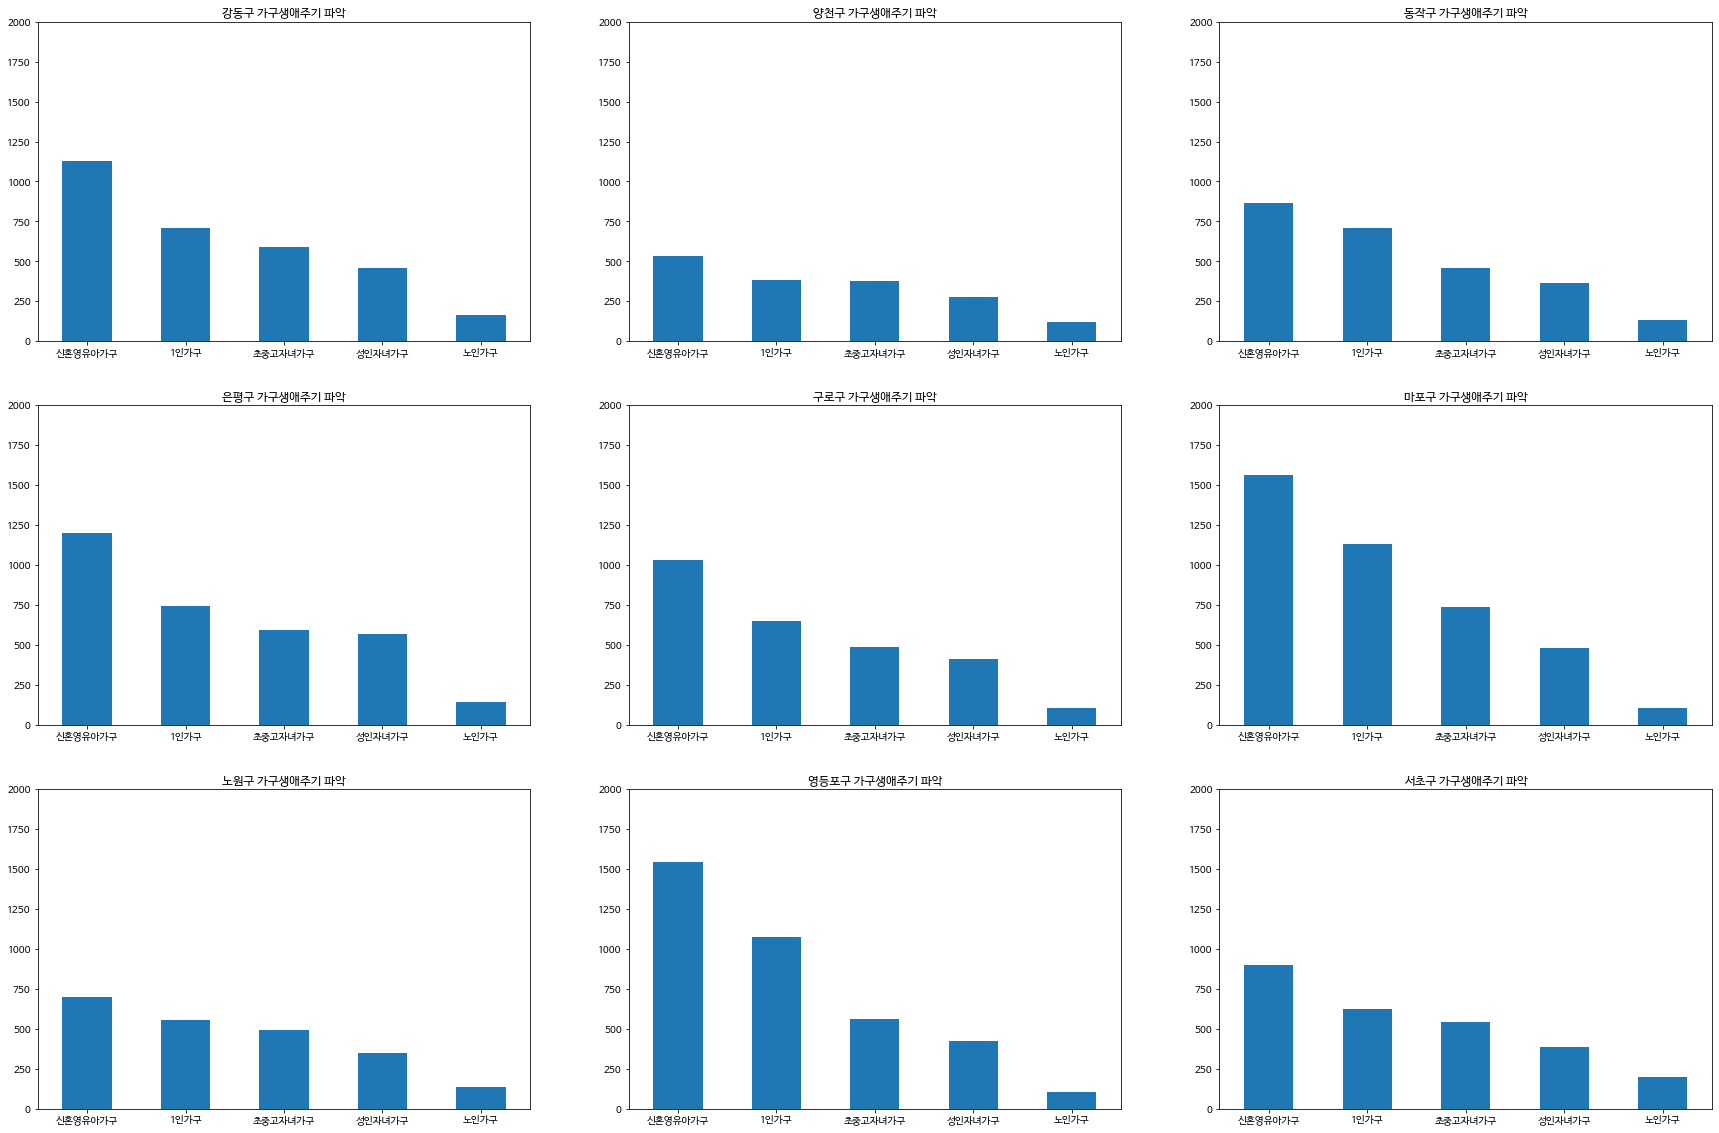

In [74]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(3,3,j+1)
    cluster3[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

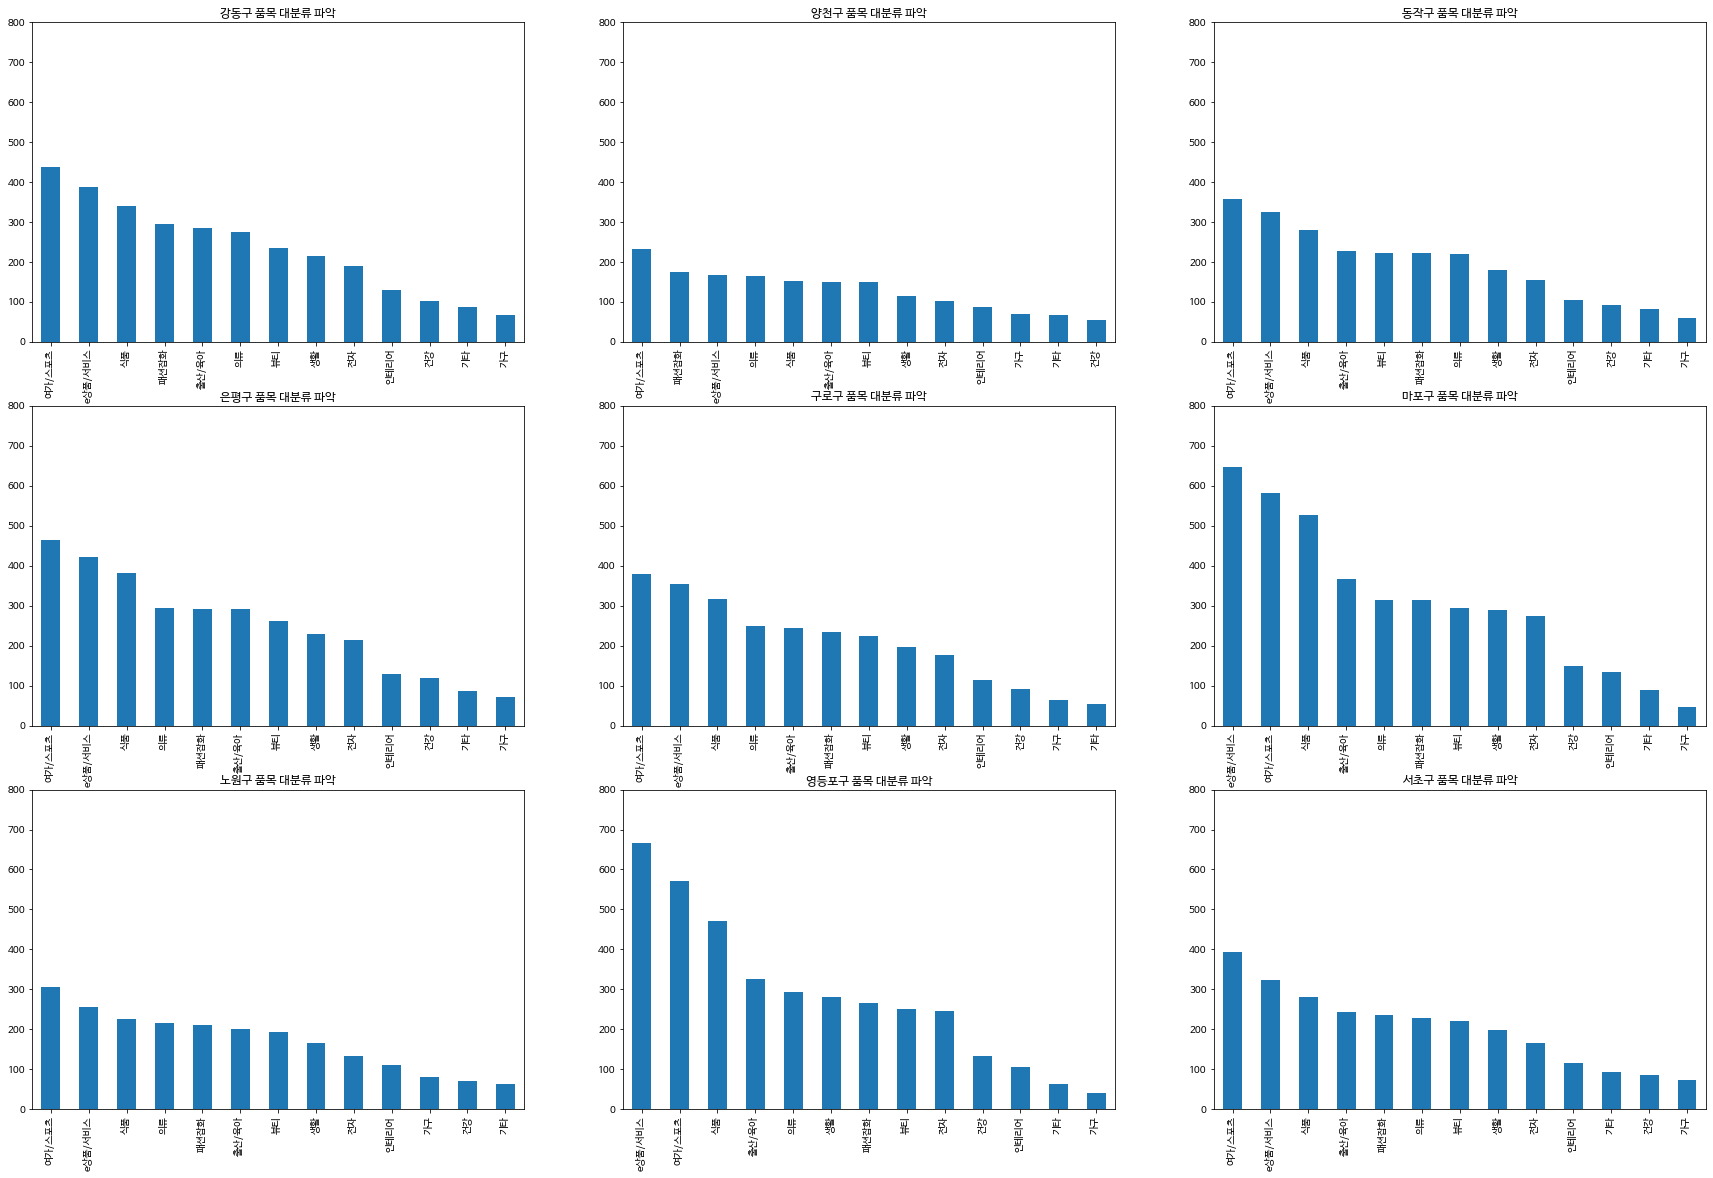

In [76]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(3,3,j+1)
    cluster3[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 800])
    plt.title(cluster3_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

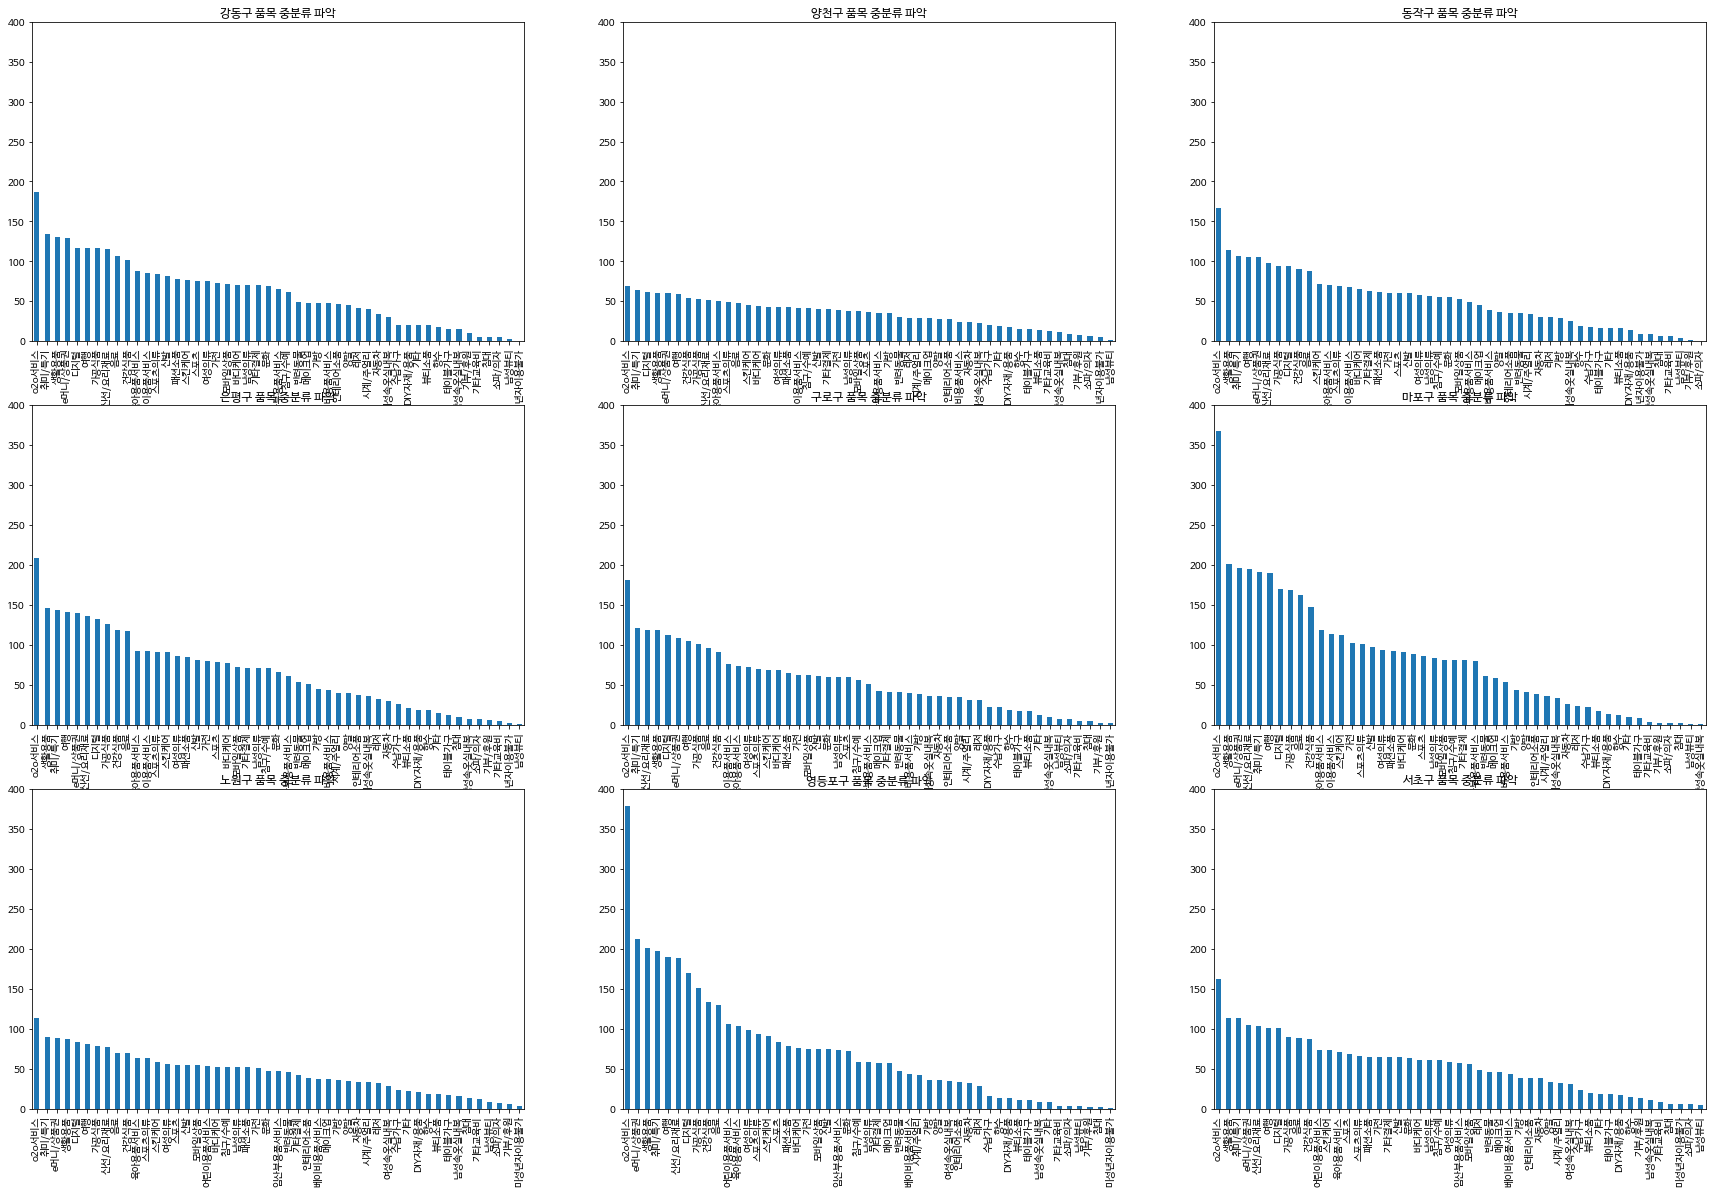

In [78]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(3,3,j+1)
    cluster3[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 400])
    plt.title(cluster3_list[j]+ ' 품목 중분류 파악')

plt.plot

In [65]:
# cluster == 4
df_1909_cluster4 = df_1909[df_1909['large_moneycount_cluster'] == 4]
cluster4_list = []
cluster4_list = df_1909_cluster4['고객소재지_시군구'].unique()

print(cluster4_list)

iscluster4 = []
for i in range(len(cluster4_list)):
    iscluster4.append(df_1909_cluster4['고객소재지_시군구'] == cluster4_list[i])
    
cluster4 = []
for i in range(len(cluster4_list)):
    cluster4.append(df_1909_cluster4[iscluster4[i]])

['종로구' '중구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

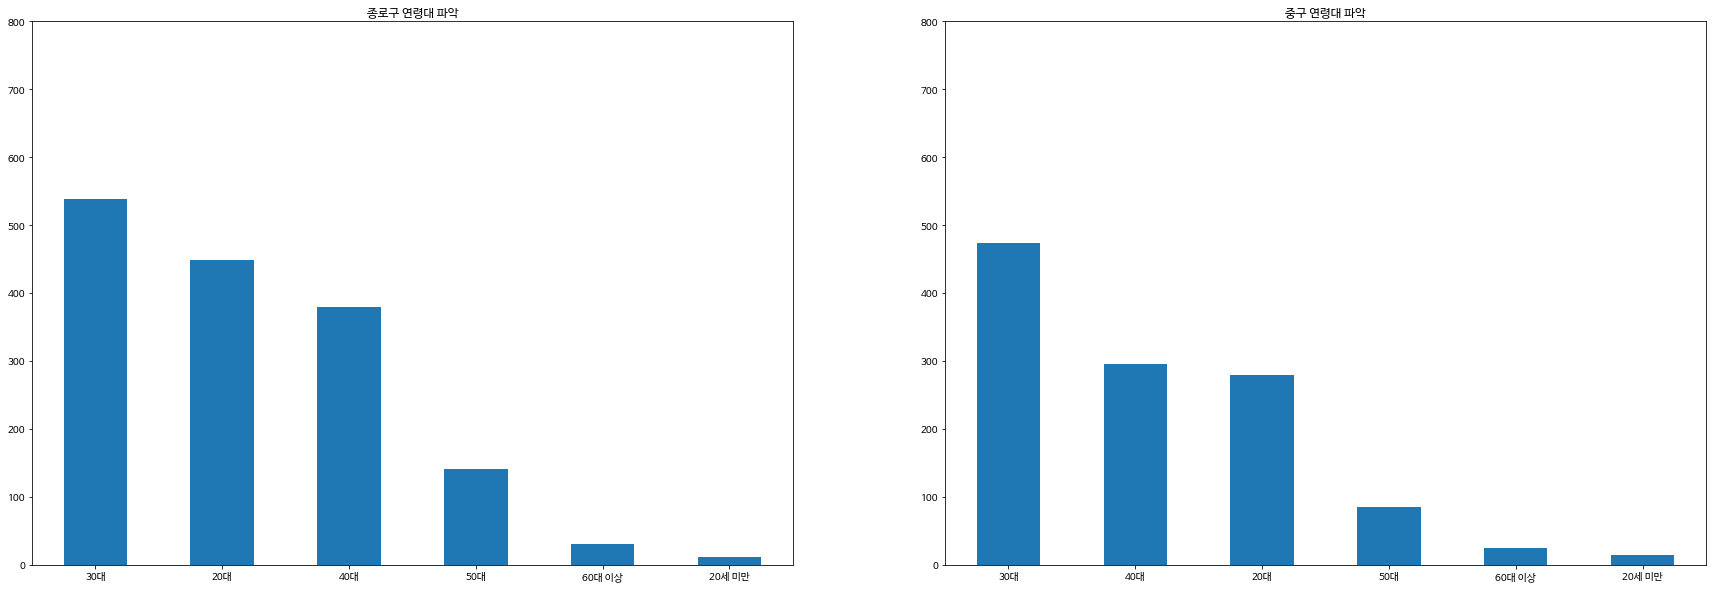

In [87]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(1,2,j+1)
    cluster4[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 800])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

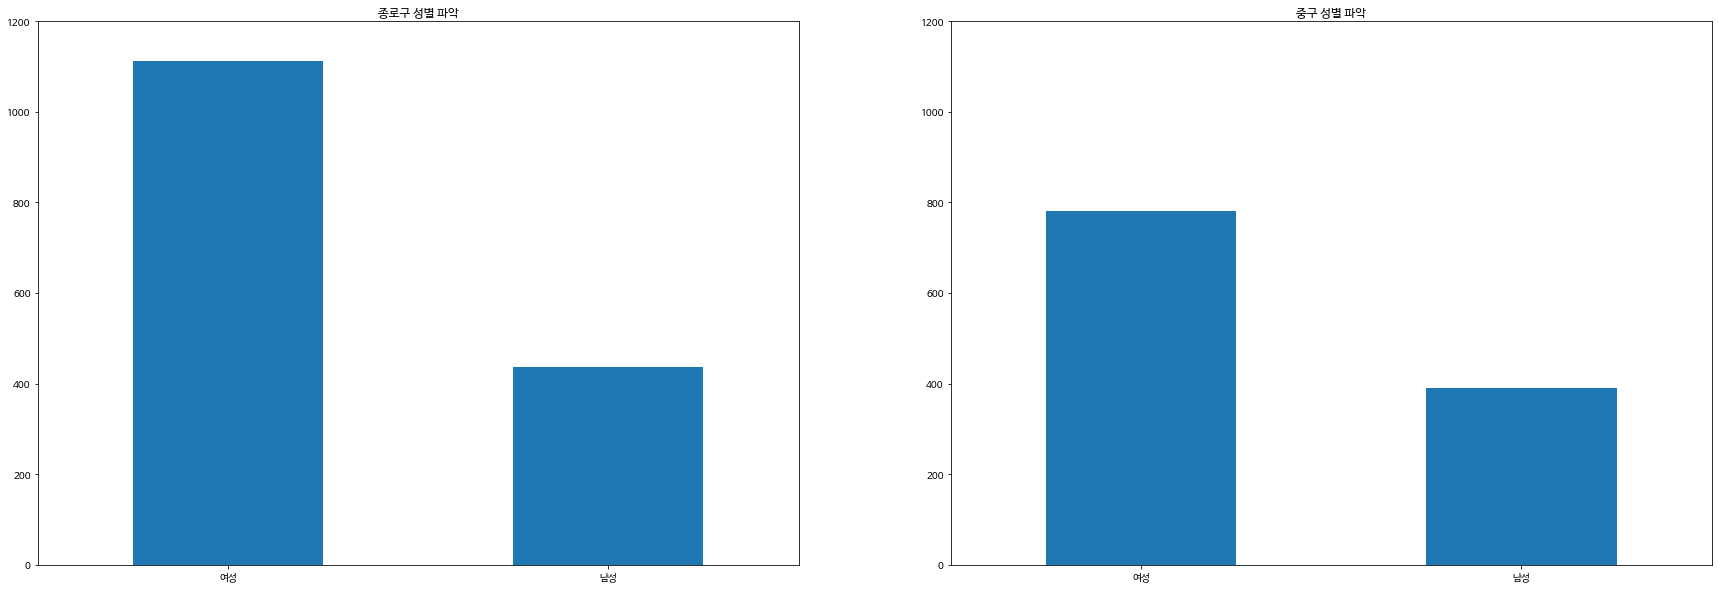

In [86]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(1,2,j+1)
    cluster4[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 1200])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

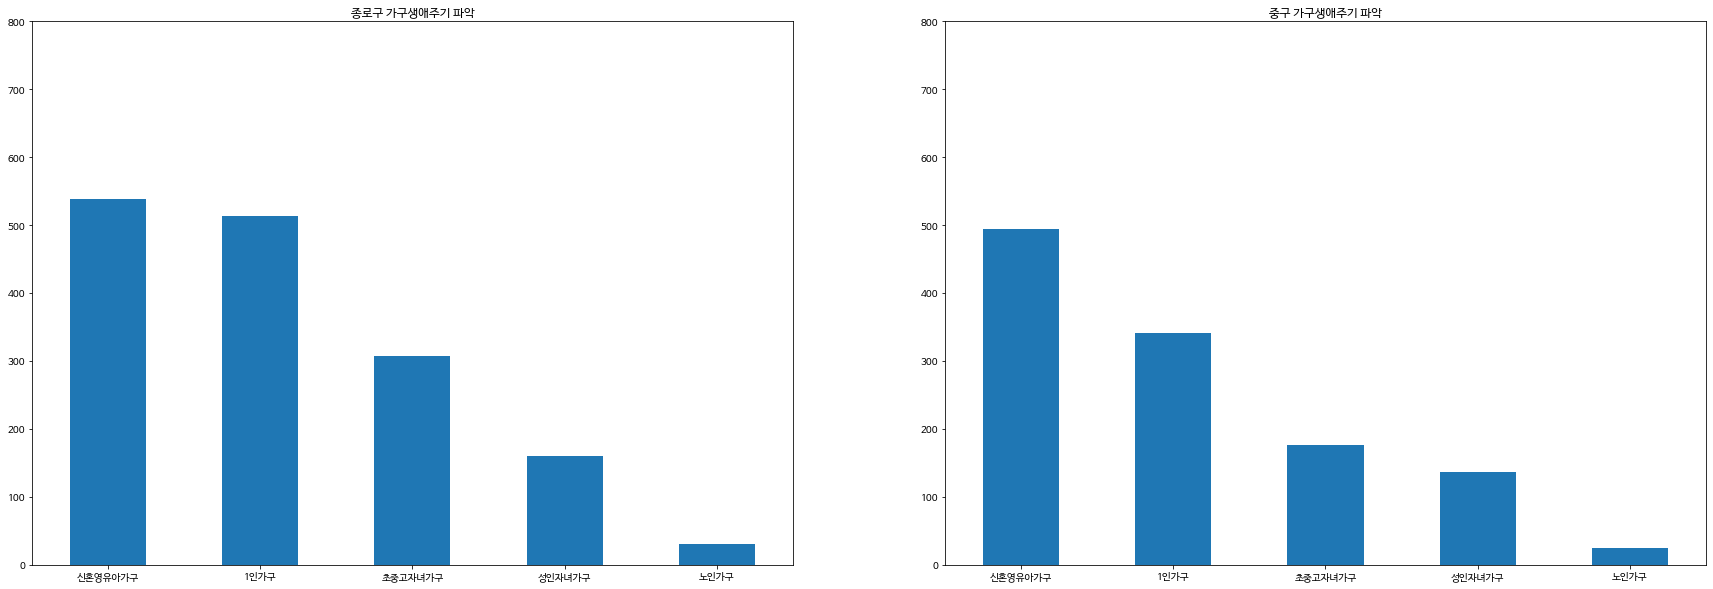

In [85]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(1,2,j+1)
    cluster4[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 800])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

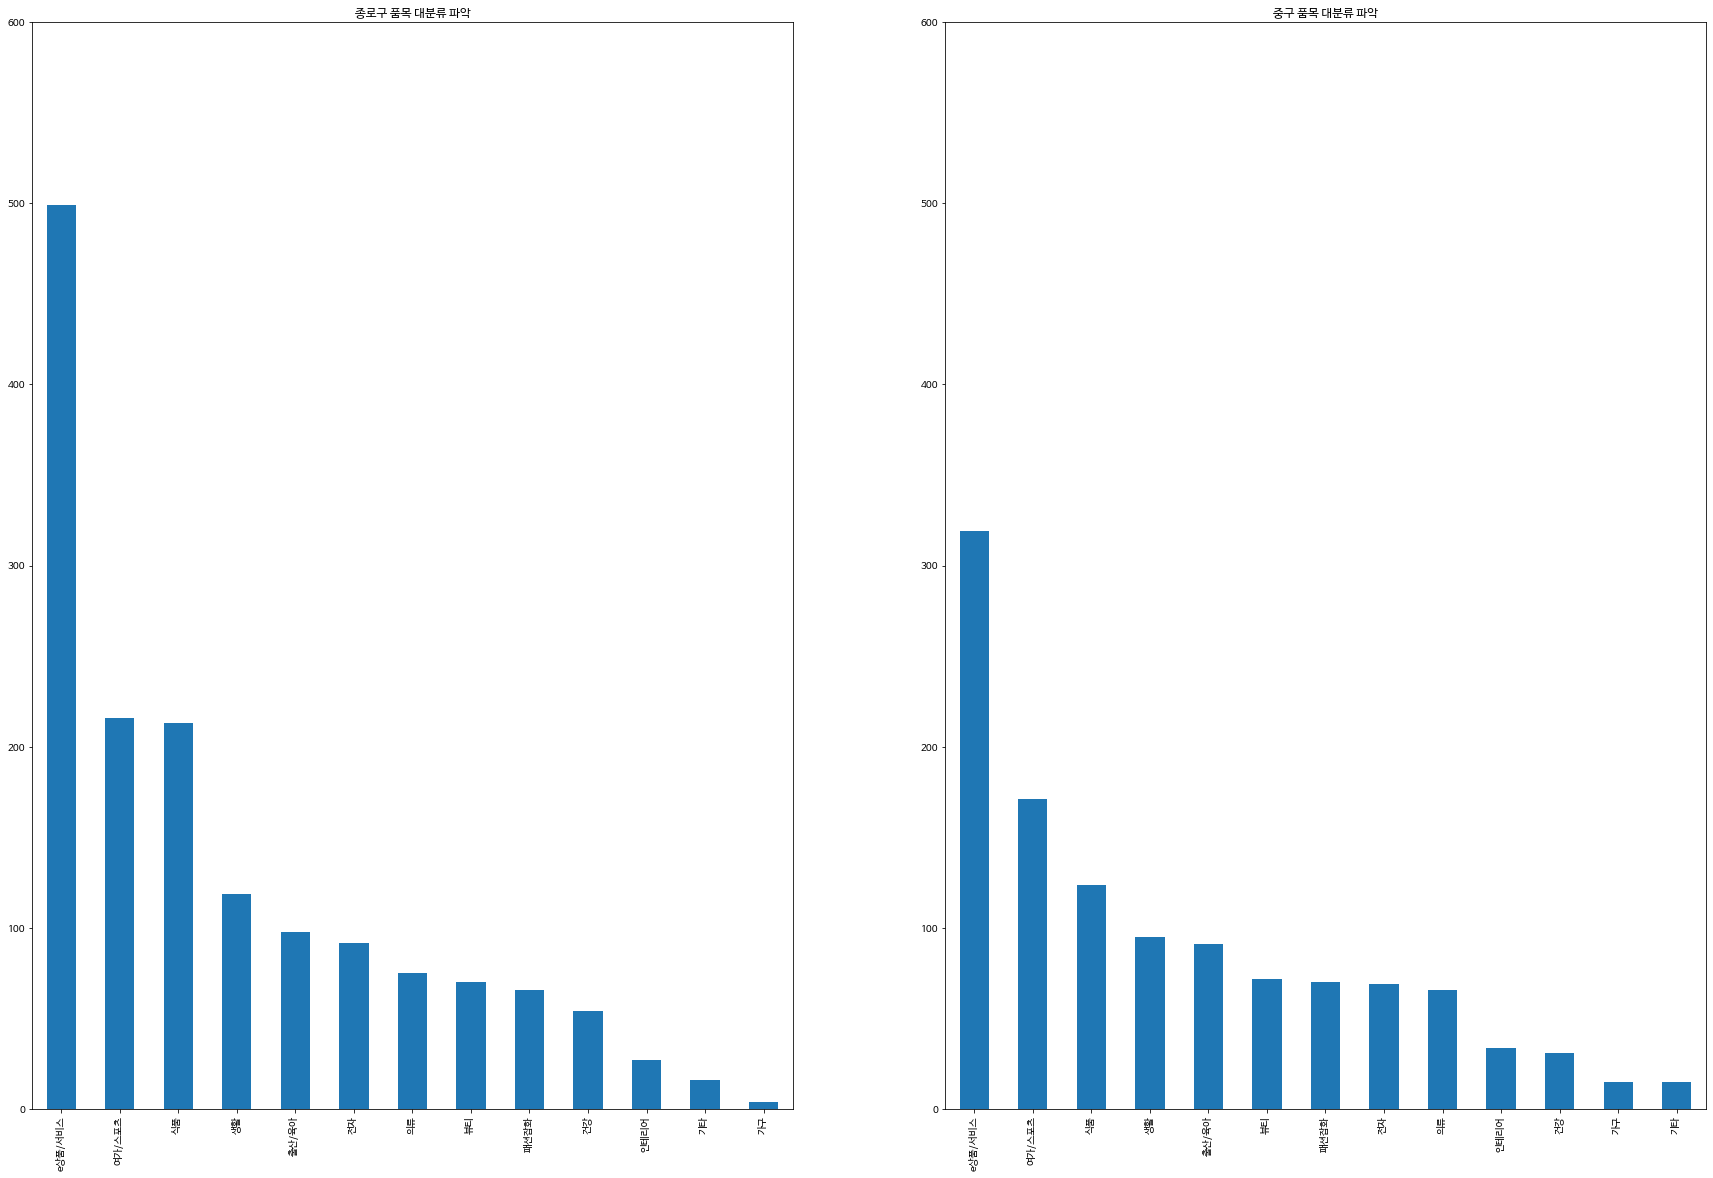

In [84]:
plt.figure(figsize = (30,20))

for j in range(len(cluster4_list)):
    plt.subplot(1,2,j+1)
    cluster4[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 600])
    plt.title(cluster4_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

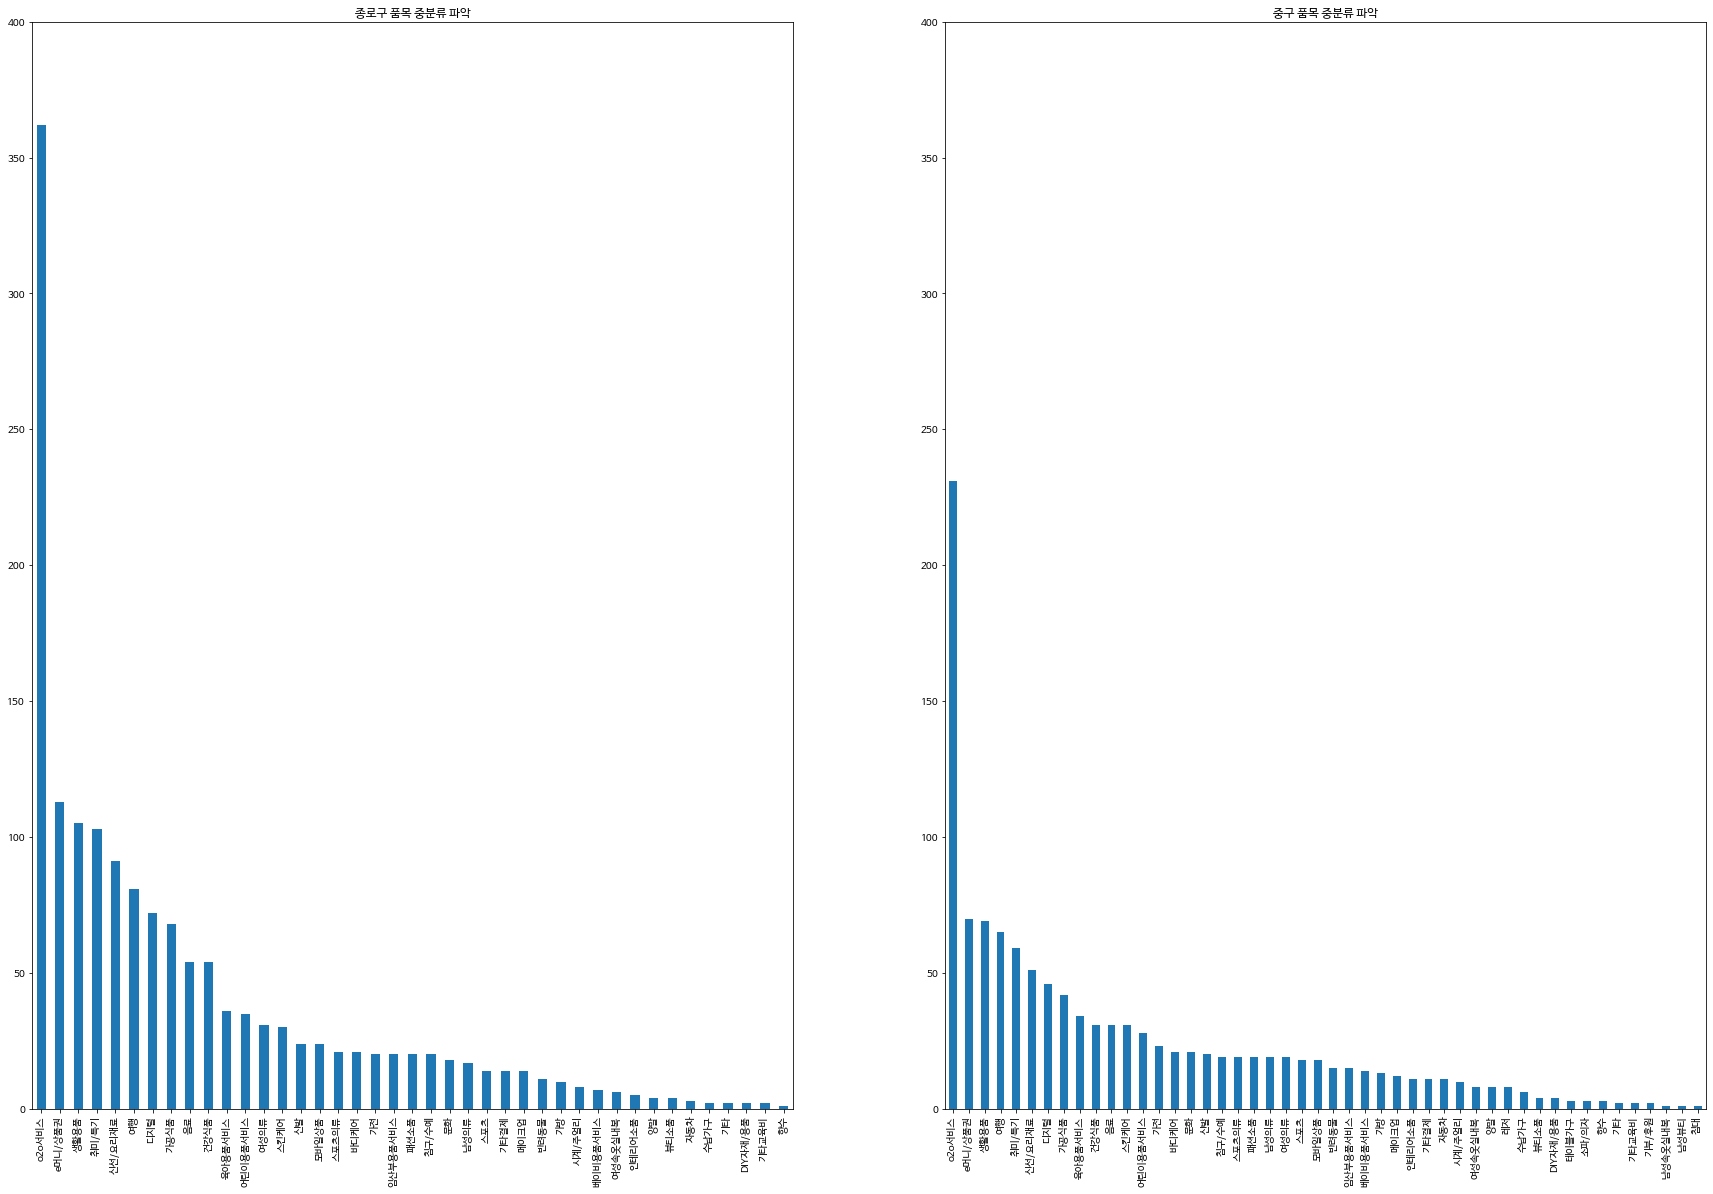

In [81]:
plt.figure(figsize = (30,20))

for j in range(len(cluster4_list)):
    plt.subplot(1,2,j+1)
    cluster4[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0,400])
    plt.title(cluster4_list[j]+ ' 품목 중분류 파악')

plt.plot